# Accident Dataset
# Data Exploration and Accident Prediction based in United States

In [1]:
# importing pandas to work on the stroke dataset
import pandas as pd

# importing linear algebra
import numpy as np

#importing visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#import folium
#import folium.plugins
%matplotlib inline
pd.set_option("display.max_columns", None)

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
# giving access to the goole collab

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
# importing dataset into pandas dataframe
data = pd.read_csv("drive/My Drive/US_Accidents.csv")
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


## Statistical Features

In [ ]:
#  Basic statistics on Numerical data
Num_columns = ['Severity', 'Start_Time', 'End_Time','Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
data[Num_columns].describe()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,5.872617e-01,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,1.632659e+00,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,1.780000e-01,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,5.940000e-01,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,1.551860e+02,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


The information that we can find here:

Distance: 25%/50% percentile are all 0; 75% percentile is 0.279 which is quite abnormal(too small).
Precipitation: 25%/50%/75% percentile are all 0 which is also quite abnormal.

In [ ]:
# Basic statistics on Nominal data
# All the Nominal data can be treated as "object" type for simplicity.

data.loc[:, ~data.columns.isin(Num_columns)].astype("object").describe() 

,ID,Start_Lat,Start_Lng,End_Lat,End_Lng,Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,1516064,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1516064,469969.0,1516064,1516064,1515981,1516064,1516064,1515129,1516064,1513762,1511816,1474206,1472057,1516064,1516064,1516064,1516064,1516064,1516064,1516064,1516064,1516064,1516064,1516064,1516064,1516064,1515981,1515981,1515981,1515981
unique,1516064,5.906110e+05,6.033690e+05,5.878240e+05,5.999160e+05,527655,37592.0,93048,2,10657,1671,49,177196,1,4,1985,24,116,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,A-3521072,4.085306e+01,-8.020638e+01,4.084992e+01,-7.394408e+01,A crash has occurred causing no to minimum del...,1.0,I-5 N,R,Los Angeles,Los Angeles,CA,91761,US,US/Eastern,KCQT,CALM,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,2.550000e+02,2.460000e+02,2.570000e+02,2.620000e+02,2709,4752.0,26645,1294562,39984,138819,448833,3617,1516064,587961,30149,202870,465252,1503661,1515803,1429681,1512809,1311566,1514335,1503480,1516013,1487917,1498368,1515575,1346095,1516064,909838,969075,1035103,1090946


The information that we can find here:

1. Street: 1-5N seems to be a common street name that an accidents would happen. The name of the street could mean something or contain some special characters.
2. Side: It seems that accidents usually happen on the right side of the road.
3. County: Los Angeles is the place that traffic accidents are likely to happen.
4. State: CA(California) is the state that traffic accidents are likely to happen.
5. Wind_Direction: CALM is the most frequent wind direction.
6. Weather_Condition: Fair is the most frequent weather condition.
7. While, the results of Wind_Direction/Weather_Condition could not be so much valuable, perhaps they are the most frequent conditions in US.

## Data Cleaning & Pre-processing

### Dropping columns which are not significant for the analysis

In [4]:
# removing the insignificant features
data = data.drop(columns=['ID', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Number', 'Street', 
                         'Zipcode', 'Airport_Code','Timezone', 'Weather_Timestamp'], axis=1)

In [15]:
#details of the features of the dataset
#memory used and the datatype

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Distance(mi)           float64
 4   Description            object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Country                object 
 10  Temperature(F)         float64
 11  Wind_Chill(F)          float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Precipitation(in)      float64
 18  Weather_Condition      object 
 19  Amenity                bool   
 20  Bump                   bool   
 21  Crossing               bool   
 22  Give_Way          

### Finding Null Values

In [ ]:
# creating function for counting missing numbers and percentage of missing numbers

def missing_statistics(df):    
    statistics = pd.DataFrame(df.isnull().sum()).reset_index()
    statistics.columns=['COLUMN NAME',"MISSING VALUES"]
    statistics['TOTAL ROWS'] = df.shape[0]
    statistics['% MISSING'] = round((statistics['MISSING VALUES']/statistics['TOTAL ROWS'])*100,2)
    return statistics
missing_statistics(data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,Severity,0,2845342,0.00
1,Start_Time,0,2845342,0.00
2,End_Time,0,2845342,0.00
3,Distance(mi),0,2845342,0.00
4,Description,0,2845342,0.00
5,Side,0,2845342,0.00
6,City,137,2845342,0.00
7,County,0,2845342,0.00
8,State,0,2845342,0.00
9,Country,0,2845342,0.00


In [5]:
print(f"There are {data.isnull().values.sum()} null values in the dataset")
print(f"There are {round(data.isnull().values.sum()/len(data)*100, 2)}% of the missing values in the dataset.")

There are 1605173 null values in the dataset
There are 56.41% of the missing values in the dataset.


### Visualization for displaying null values

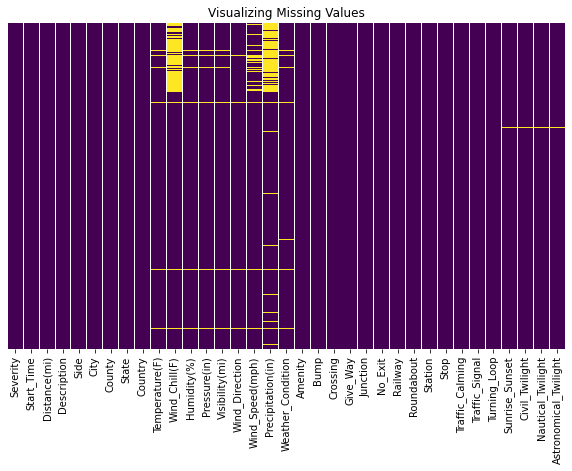

In [ ]:
plt.figure(figsize=(10,6))
# visualizing the missing data through heat map.
sns.heatmap(data.isnull(), yticklabels= False, cbar=False, cmap='viridis')
plt.title('Visualizing Missing Values')
plt.show()

### These are the null values which needs to be dealt with
City                        137
Timezone                   3659
Temperature(F)            69274
Humidity(%)               73092
Pressure(in)              59200
Visibility(mi)            70546
Wind_Direction            73775
Wind_Speed(mph)          157944
Precipitation(in)        549458
Weather_Condition         70636
Sunrise_Sunset             2867
Civil_Twilight             2867
Nautical_Twilight          2867
Astronomical_Twilight      2867


Numerical Null values
 10  Temperature(F)         float64
 11  Humidity(%)            float64
 12  Pressure(in)           float64
 13  Visibility(mi)         float64
 14 
 15  Wind_Speed(mph)        float64
 16  Precipitation(in)      float64
 17  

## Handling Null Values

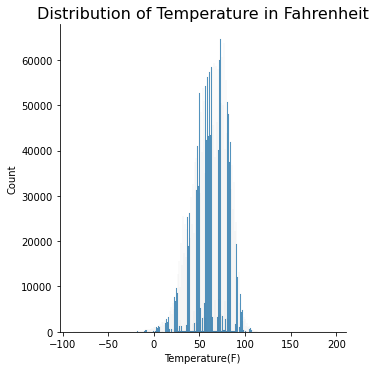

In [6]:
sns.displot(data['Temperature(F)'])
plt.title("Distribution of Temperature in Fahrenheit", fontsize=16)
plt.show()

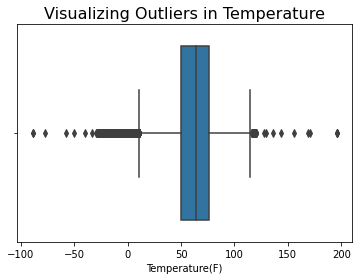

In [7]:
sns.boxplot(data = data, x='Temperature(F)')
plt.title("Visualizing Outliers in Temperature", fontsize=16)
plt.show()

temperature is skewd so..we will use median

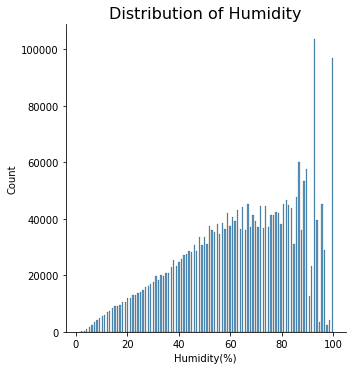

In [8]:
sns.displot(data['Humidity(%)'])
plt.title("Distribution of Humidity", fontsize=16)
plt.show() 
# distribution in rightly skewed

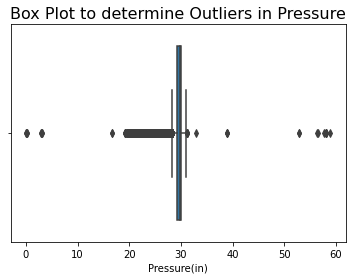

In [9]:
sns.boxplot(data = data, x='Pressure(in)')
plt.title("Box Plot to determine Outliers in Pressure", fontsize=16)
plt.show()

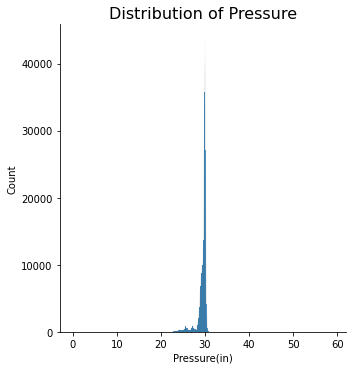

In [10]:
sns.displot(data['Pressure(in)'])
plt.title("Distribution of Pressure", fontsize=16)
plt.show() 

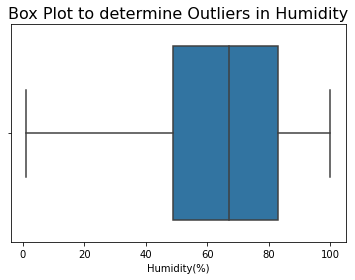

In [ ]:
sns.boxplot(data = data, x='Humidity(%)')
plt.title("Box Plot to determine Outliers in Humidity", fontsize=16)
plt.show()

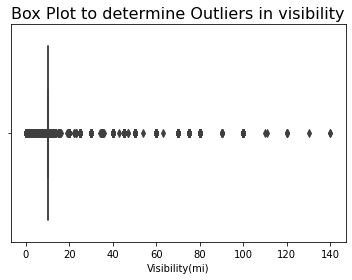

In [ ]:
sns.boxplot(data = data, x='Visibility(mi)')
plt.title("Box Plot to determine Outliers in visibility", fontsize=16)
plt.show()

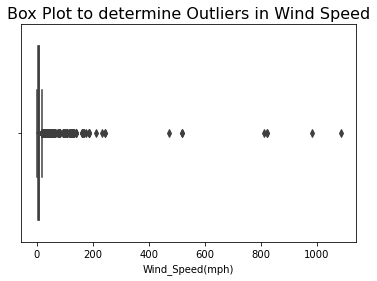

In [ ]:
sns.boxplot(data = data, x='Wind_Speed(mph)')
plt.title("Box Plot to determine Outliers in Wind Speed", fontsize=16)
plt.show()

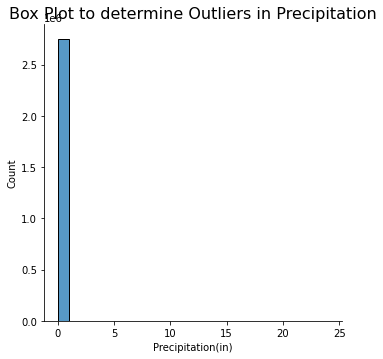

In [ ]:
sns.displot(data = data, x='Precipitation(in)')
plt.title("Box Plot to determine Outliers in Precipitation", fontsize=16)
plt.show()

### Data Imputation

In [5]:
# Filling the missing data with the following statistical methods for the following features.
# Pressure median
# temperature median
# Humidity(%) mean
# Visibility(mi) median        
# Wind_Speed(mph)  median      
# Precipitation(in) median

data['Pressure(in)'] = data['Pressure(in)'].fillna(round(data['Pressure(in)'].median(), 2))
data['Temperature(F)'] = data['Temperature(F)'].fillna(round(data['Temperature(F)'].median(), 2))
data['Humidity(%)'] = data['Humidity(%)'].fillna(round(data['Humidity(%)'].mean(), 2))
data['Visibility(mi)'] = data['Visibility(mi)'].fillna(round(data['Visibility(mi)'].median(), 2))
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].fillna(round(data['Wind_Speed(mph)'].median(), 2))
data['Precipitation(in)'] = data['Precipitation(in)'].fillna(round(data['Precipitation(in)'].median(), 2))
data['Wind_Chill(F)'] = data['Wind_Chill(F)'].fillna(round(data['Wind_Chill(F)'].median(), 2))

In [ ]:
print(f"There are {round(data.isnull().values.sum()/len(data)*100, 2)}% of the missing values in the dataset.")

There are 5.48% of the missing values in the dataset.


In [6]:
# Dropping the remaining  null values
data = data.dropna() 
print(f"There are {round(data.isnull().values.sum()/len(data)*100, 2)}% of the missing values in the dataset.")

There are 0.0% of the missing values in the dataset.


####We have handled the missing data sucessfully!

# Exploratory Data Analysis

### Distribution Of Severity

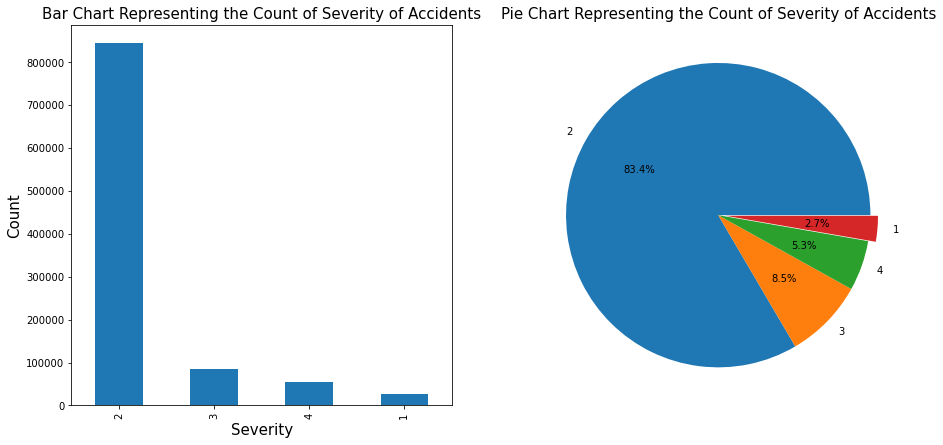

In [ ]:
# Returning the two plots (Bar Chart and Pie Chart)
fig = plt.figure(figsize=(15, 7))

# printing two plots in one axis
ax1 = fig.add_subplot(1,2,1)

params = {'kind':'bar'}
data.Severity.value_counts().rename("").plot(**params)
ax1.set_xlabel('Severity', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
plt.title("Bar Chart Representing the Count of Severity of Accidents", fontsize=15)

ax2 = fig.add_subplot(1,2,2)
params = {'kind':'pie', 'explode':(0,0,0, 0.05), 'autopct':'%1.1f%%'}
data.Severity.value_counts().rename("").plot(**params)
plt.title("Pie Chart Representing the Count of Severity of Accidents", fontsize=15)
plt.show()

### What is the relationship between distance and severity?


In [ ]:
# Calculate the mean distance of each Severity
mean_distance = data.groupby('Severity')["Distance(mi)"].mean().round(2)
mean_distance_df = pd.DataFrame(mean_distance)

mean_distance_fig = px.bar(mean_distance_df, 
                                   x = mean_distance_df.index, 
                                   y = "Distance(mi)",
                                   labels={"index": "Severity"},
                                   text="Distance(mi)")
mean_distance_fig.update_layout(
    autosize=False,
    width=600,
    height=500,
    title={
        'text': "Mean Distance(mile) of each Severity Category",
        'y':0.95,
        'x':0.5,
        'font': {'size': 15},
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis={
        'type':'category'
    })
mean_distance_fig.show()

## Geographical Locations with Severity

### What are the top 10 states with the most accidents?

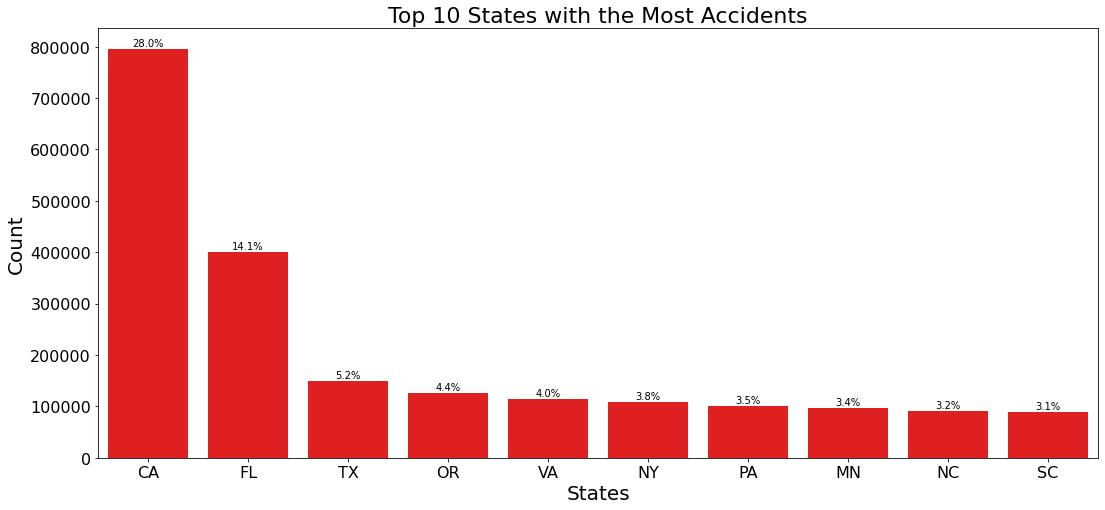

In [11]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x="State", 
              data=data, 
              order=data['State'].value_counts()[:10].index, 
              color ='red')
plt.title("Top 10 States with the Most Accidents", fontsize = 22)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("States",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.show()

#### What are the Top 10 States with the Most Accidents with Severity?

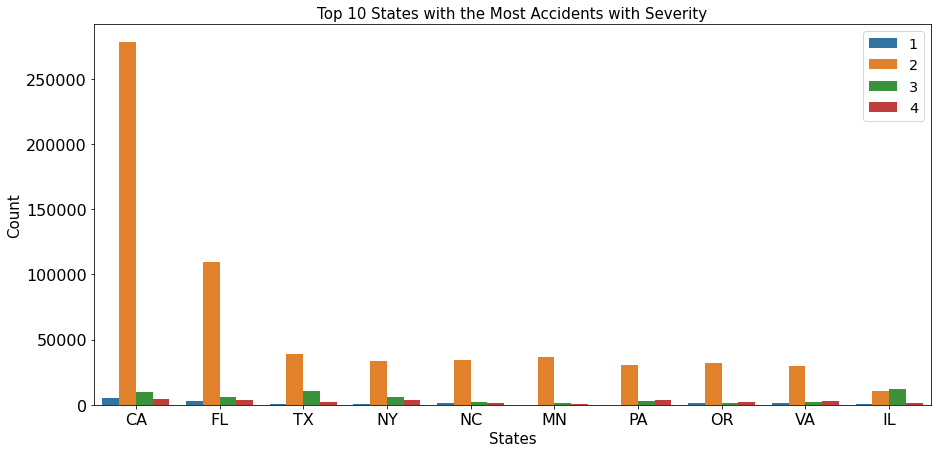

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x="State", 
              data=data, 
              order=data['State'].value_counts()[:10].index, 
              hue='Severity',
              palette='tab10')
plt.title("Top 10 States with the Most Accidents with Severity", fontsize = 15)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("States",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.show()

### What are the top 10 counties with the most accidents?

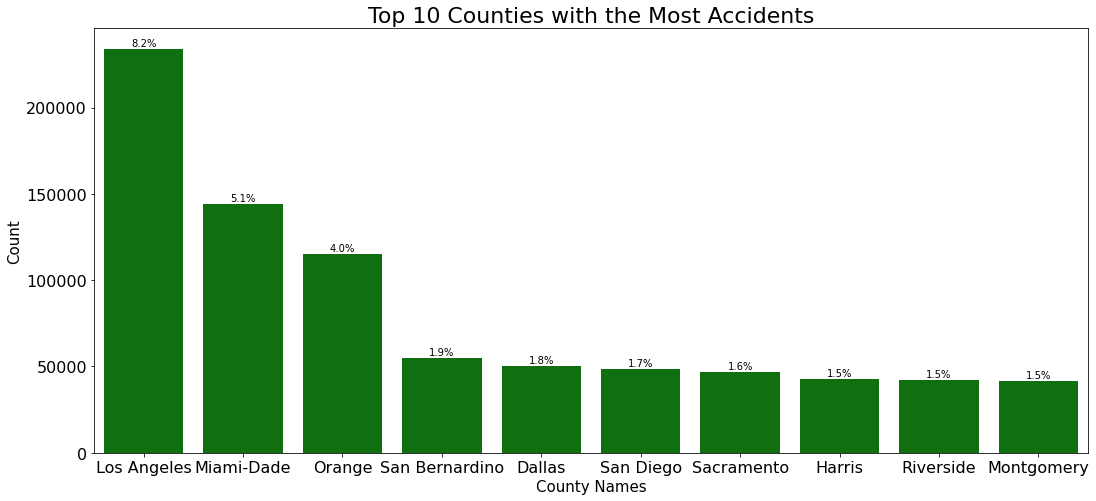

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x="County", 
              data=data, 
              order=data['County'].value_counts()[:10].index, 
              color ='green')
plt.title("Top 10 Counties with the Most Accidents", fontsize = 22)
ax.set_xlabel("County Names",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

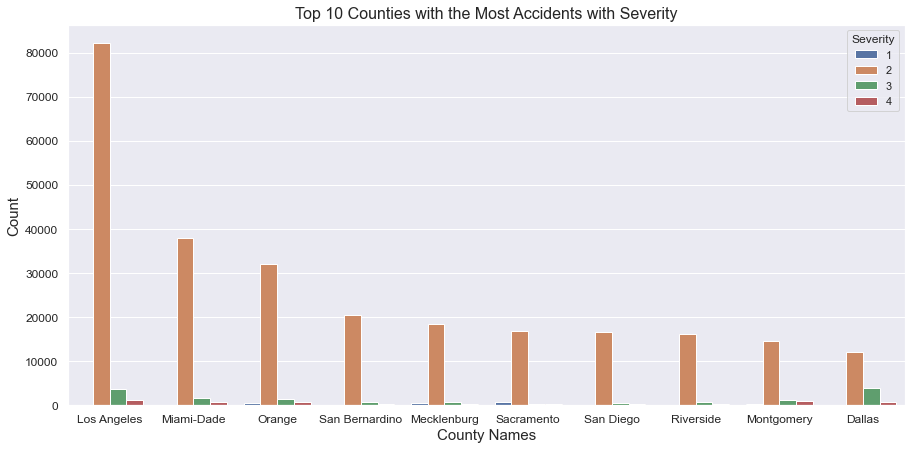

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x="County", 
              data=data, 
              order=data['County'].value_counts()[:10].index, 
               hue='Severity')
plt.title("Top 10 Counties with the Most Accidents with Severity", fontsize =16)
ax.set_xlabel("County Names",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###  What are the top 10 cities with the most accidents?

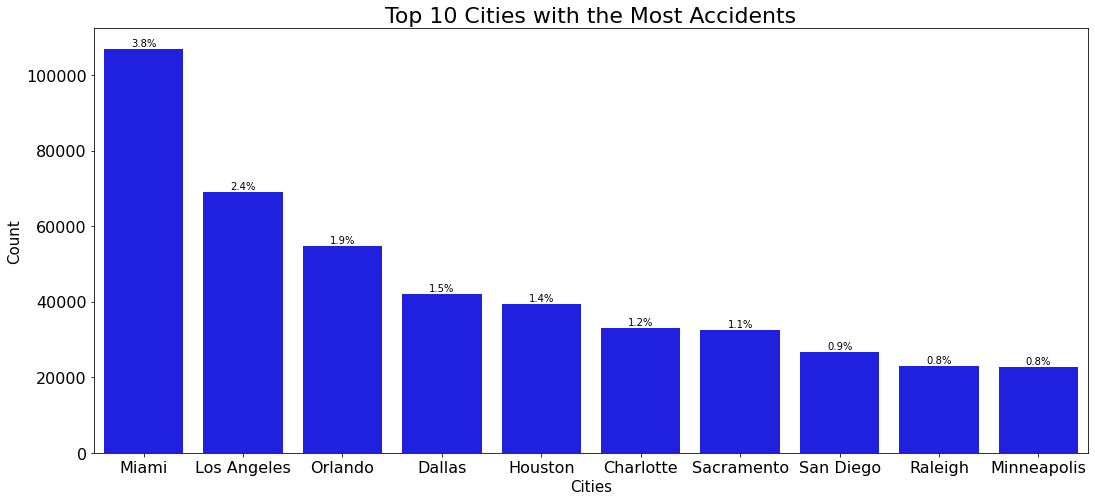

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x="City", 
              data=data, 
              order=data['City'].value_counts()[:10].index, 
              color ='blue')
plt.title("Top 10 Cities with the Most Accidents", fontsize = 22)
ax.set_xlabel("Cities",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

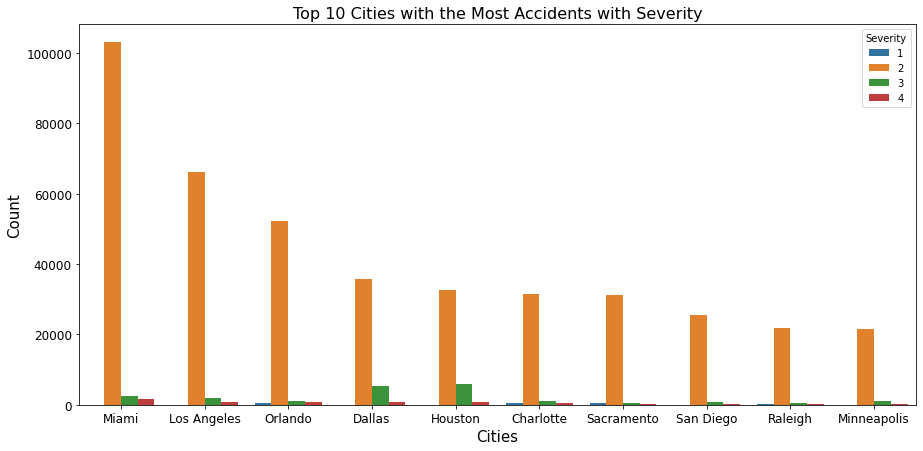

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x="City", 
              data=data, 
              order=data['City'].value_counts()[:10].index, 
               hue='Severity')
plt.title("Top 10 Cities with the Most Accidents with Severity", fontsize =16)
ax.set_xlabel("Cities",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

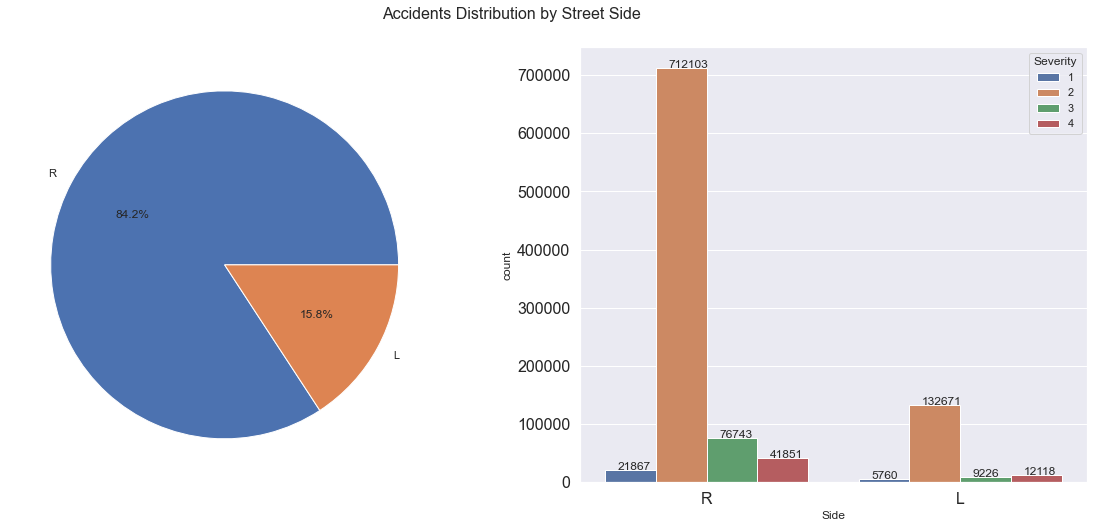

In [ ]:
# Accidents distribution by street Side
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
# Pie chart
data["Side"].value_counts().plot.pie(autopct="%.1f%%", ylabel='', ax=axes[0])

sns.countplot(x="Side", 
              data = data, 
              order=data['Side'].value_counts().index, 
              hue = 'Severity',
             ax=axes[1], fontsize = 16)
for p in axes[1].patches:
        axes[1].annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+100))

plt.set_xlabel("Cities",fontsize=15)
plt.set_ylabel("Count",fontsize=15)
plt.suptitle("Accidents Distribution by Street Side", y=0.95, fontsize=16)
plt.show()

# Environmental Analysis

### Weather Condition with Severity

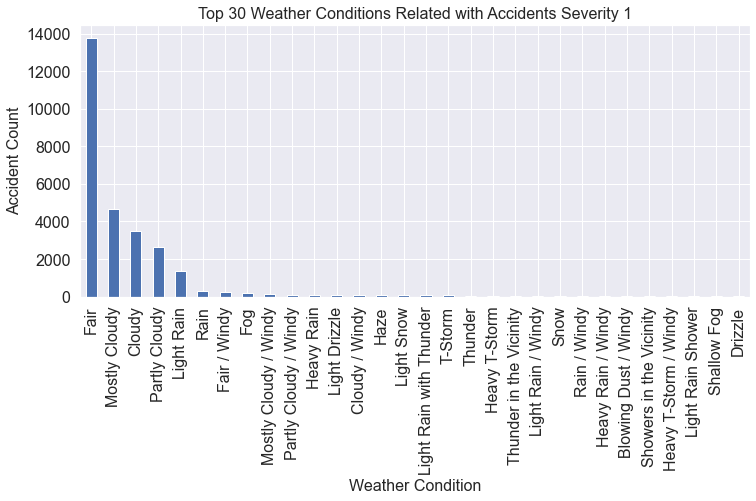

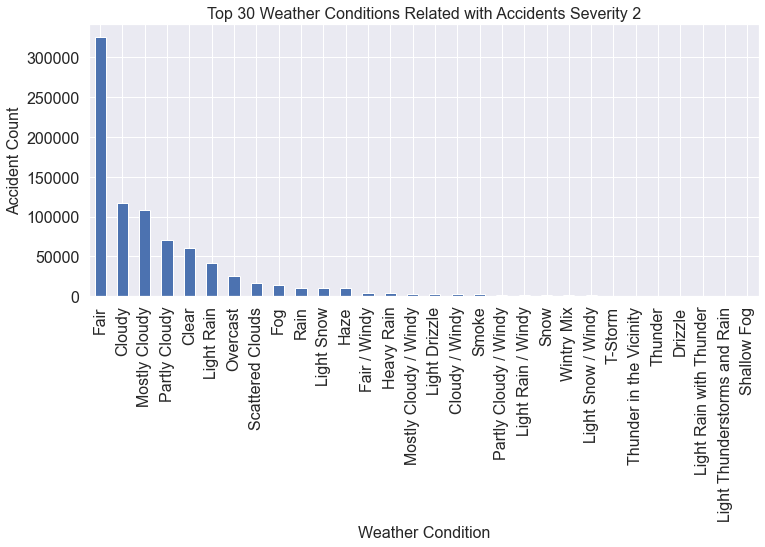

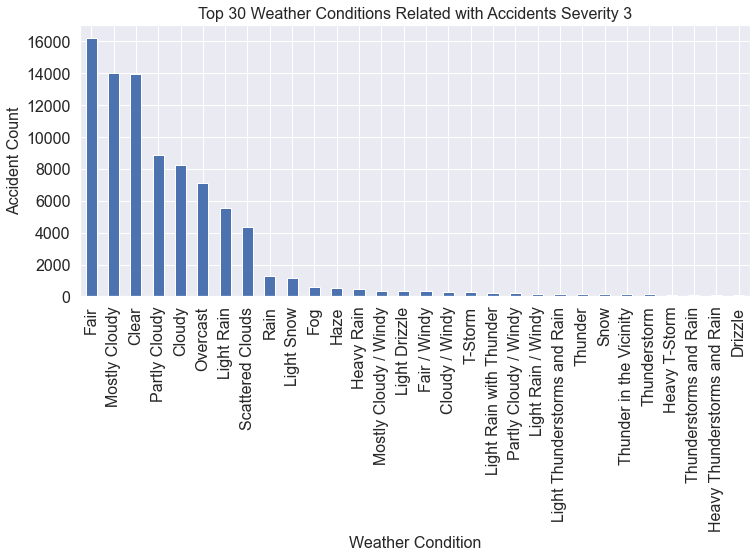

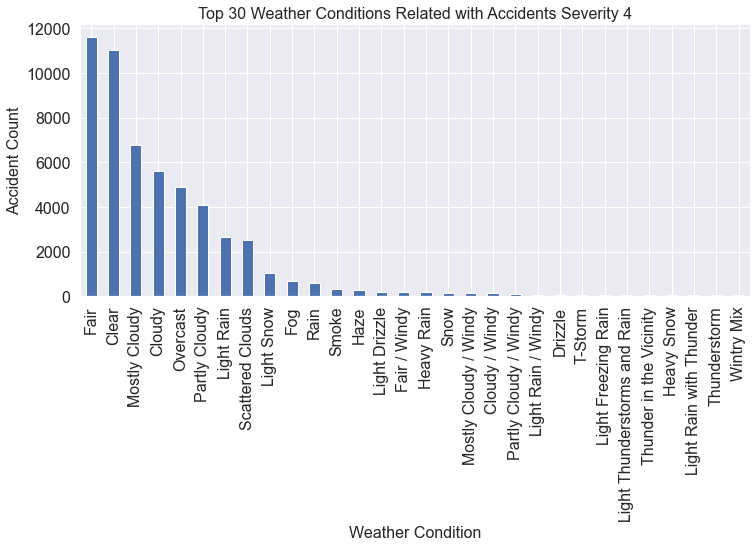

In [ ]:
sns.set()
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    data.loc[data["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar()#(width=0.5,color='r',edgecolor='y',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('Top 30 Weather Conditions Related with Accidents Severity ' + str(s), fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

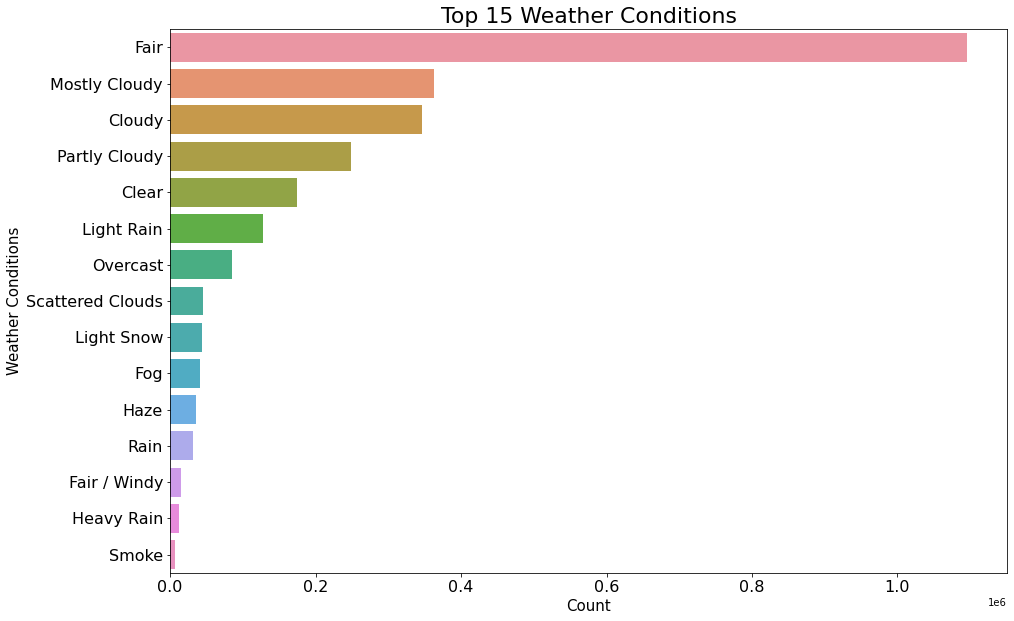

In [ ]:
fig = plt.figure(figsize = (15, 10))
ax = sns.countplot(y='Weather_Condition', 
              data=data, 
              order=data['Weather_Condition'].value_counts()[:15].index)
plt.title("Top 15 Weather Conditions", fontsize = 22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("Count",fontsize=15)
ax.set_ylabel("Weather Conditions",fontsize=15)
plt.show()

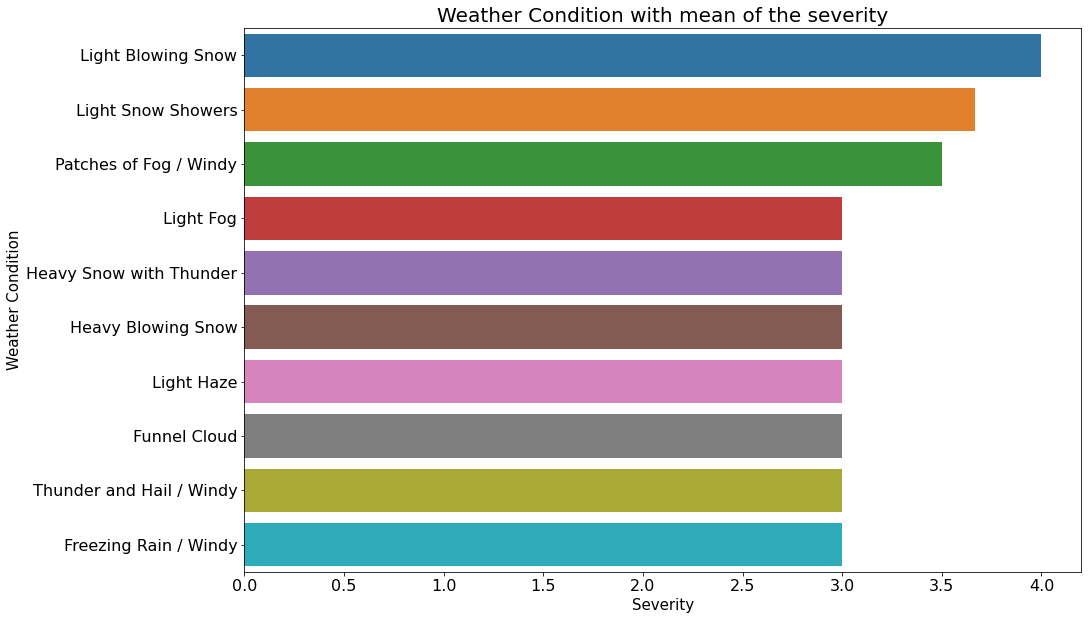

In [ ]:
# Weather condition by mean of the Severity
weather_mean_severity = data.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False)
weather_mean_severity_df = pd.DataFrame(weather_mean_severity[:10])

plt.figure(figsize=(15, 10)) # Set the figure size
weather_mean_severity_graph = sns.barplot(y = weather_mean_severity_df.index, x = "Severity", data=weather_mean_severity_df, orient="h")
weather_mean_severity_graph.set_title("Weather Condition with mean of the severity", fontsize = 20)
weather_mean_severity_graph.set_ylabel("Weather Condition", fontsize=15)
weather_mean_severity_graph.set_xlabel("Severity", fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

cloudy, Foggy and windy weather are the top three dangerous weather for the severe accident

### Environment Attribute(numerical) distribution and the relationship with Severity

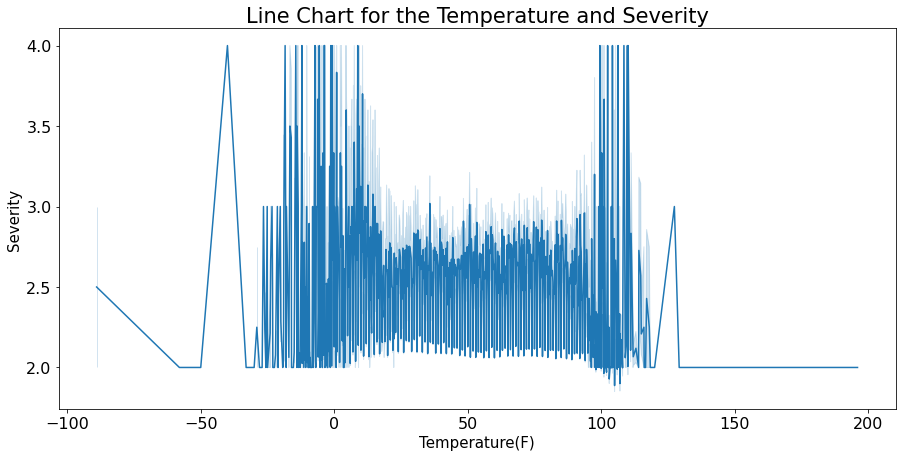

In [68]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = "Temperature(F)", y = "Severity", data = data)
plt.title('Line Chart for the Temperature and Severity', fontsize=21)

ax.set_xlabel("Temperature(F)",fontsize=15)
ax.set_ylabel("Severity",fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

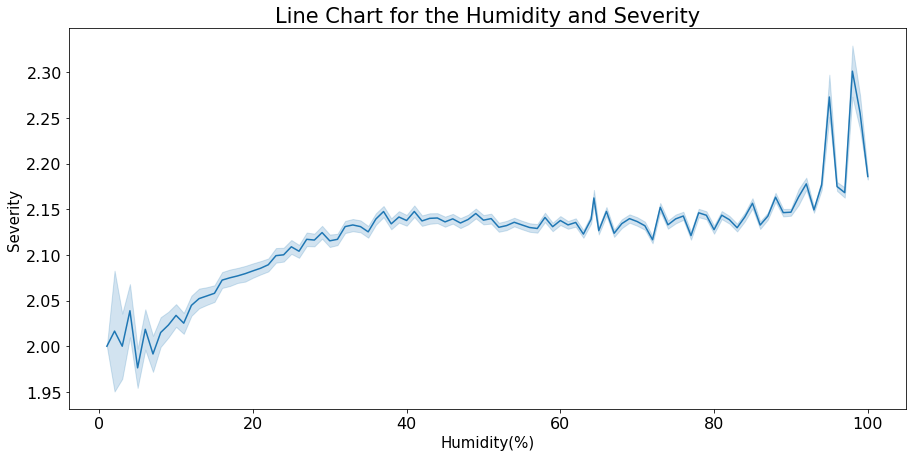

In [69]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = "Humidity(%)", y = "Severity", data = data)
plt.title('Line Chart for the Humidity and Severity', fontsize=21)
ax.set_xlabel("Humidity(%)",fontsize=15)
ax.set_ylabel("Severity",fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

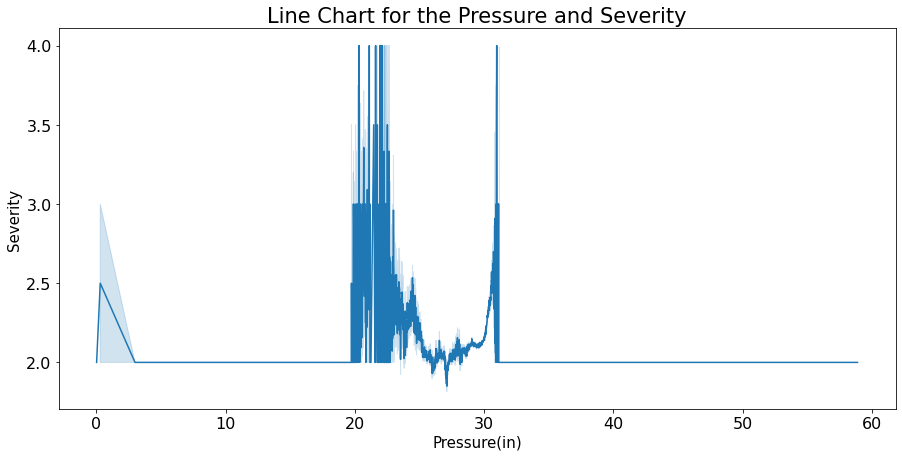

In [70]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = "Pressure(in)", y = "Severity", data = data)
plt.title('Line Chart for the Pressure and Severity', fontsize=21)
ax.set_xlabel("Pressure(in)",fontsize=15)
ax.set_ylabel("Severity",fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

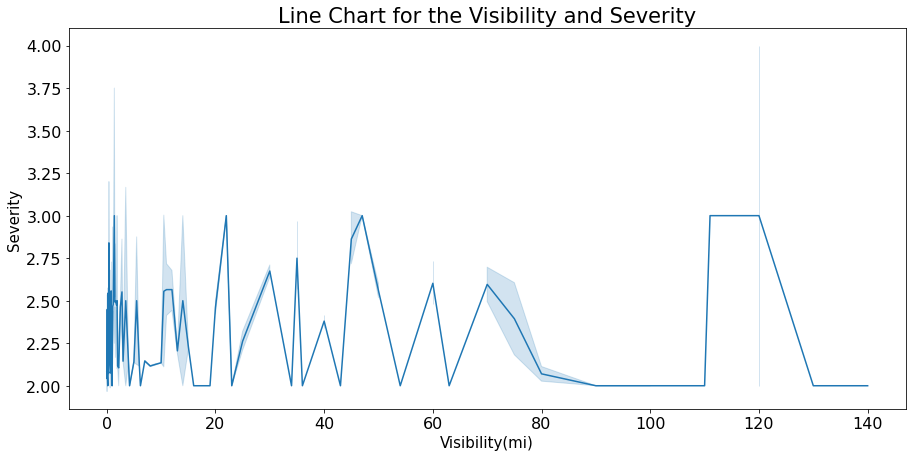

In [71]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = "Visibility(mi)", y = "Severity", data = data)
plt.title('Line Chart for the Visibility and Severity', fontsize=21)
ax.set_xlabel("Visibility(mi)",fontsize=15)
ax.set_ylabel("Severity",fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

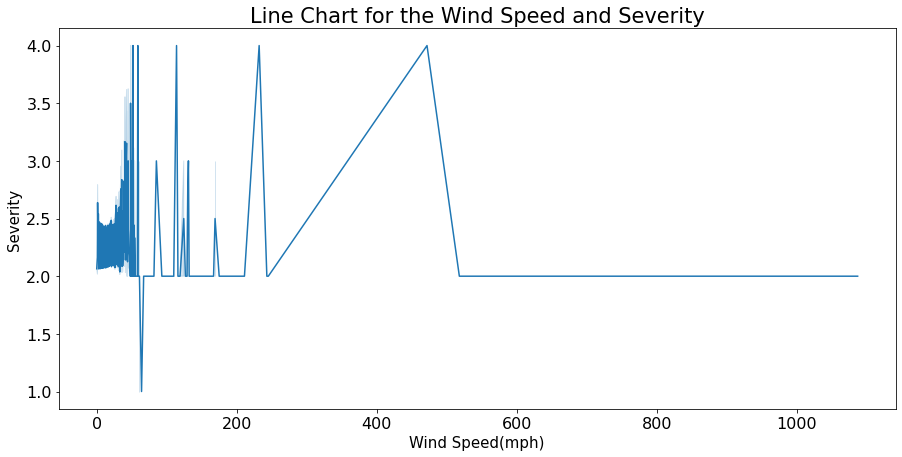

In [72]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = "Wind_Speed(mph)", y = "Severity", data = data)
plt.title('Line Chart for the Wind Speed and Severity', fontsize=21)
ax.set_xlabel("Wind Speed(mph)",fontsize=15)
ax.set_ylabel("Severity",fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Accidents distribution by Sunrise && Sunset

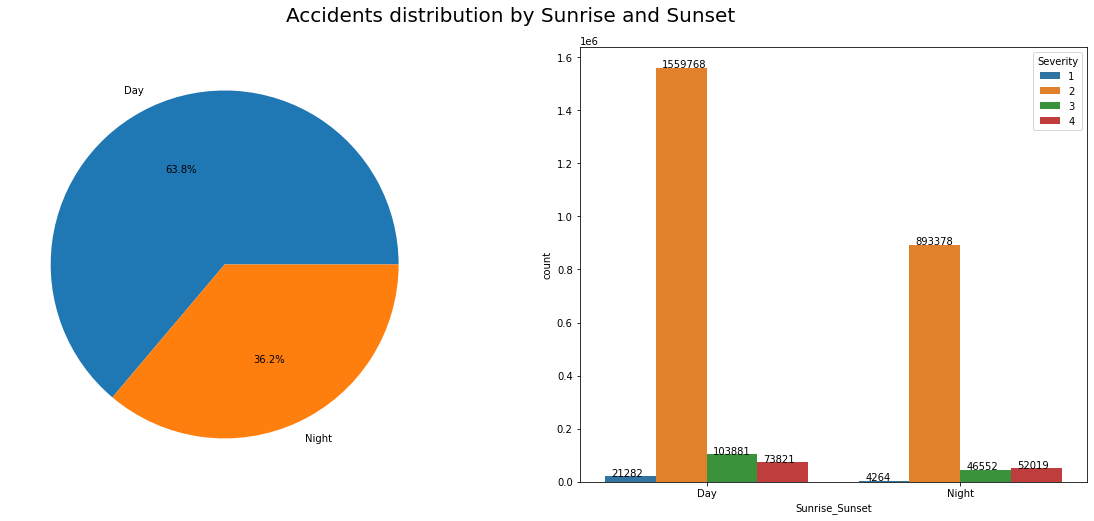

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
# Pie chart
data["Sunrise_Sunset"].value_counts().plot.pie(autopct="%.1f%%", ylabel='', ax=axes[0])

sns.countplot(x="Sunrise_Sunset", 
              data = data, 
              order=data['Sunrise_Sunset'].value_counts().index, 
              hue = 'Severity',
             ax=axes[1])
for p in axes[1].patches:
        axes[1].annotate(p.get_height(), (p.get_x()+0.025, p.get_height()+100))

# Common title
plt.subtitle("Accidents distribution by Sunrise and Sunset", y=0.95, fontsize=20)
plt.show()

## Date and Time Analysis

In [73]:
data.head()

,Severity,Start_Time,End_Time,Distance(mi),Description,Side,City,County,State,Country,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,hours_traffic_impact,hour_of_accident,year_of_accident,month_of_accident,Month,Week,Hour,Duration
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,R,Dublin,Franklin,OH,US,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,6,0,2016,2,2,Monday,0,6.0
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,0.747,At OH-4/OH-235/Exit 41 - Accident.,R,Dayton,Montgomery,OH,US,36.9,63.0,91.0,29.68,10.0,Calm,7.0,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,6,5,2016,2,2,Monday,5,6.0
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,0.055,At I-71/US-50/Exit 1 - Accident.,R,Cincinnati,Hamilton,OH,US,36.0,63.0,97.0,29.70,10.0,Calm,7.0,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,6,6,2016,2,2,Monday,6,6.0
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,0.123,At Dart Ave/Exit 21 - Accident.,R,Akron,Summit,OH,US,39.0,63.0,55.0,29.65,10.0,Calm,7.0,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,6,6,2016,2,2,Monday,6,6.0
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,At Mitchell Ave/Exit 6 - Accident.,R,Cincinnati,Hamilton,OH,US,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,6,7,2016,2,2,Monday,7,6.0


In [8]:
# converting start time in datetime format
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

# converting End time in datetime format
data['End_Time'] = pd.to_datetime(data['End_Time'])

# Calculate duration of accident in hours 
data['hours_traffic_impact'] = round((data['End_Time'] - data['Start_Time']) / pd.Timedelta(hours=1),0).astype(int)

# creating the feature hour
data['hour_of_accident'] = data['Start_Time'].dt.hour

# creating the feature year
data['year_of_accident'] = data['Start_Time'].dt.year

# creating the feature month
data['month_of_accident'] = data['Start_Time'].dt.month


### Year Analysis

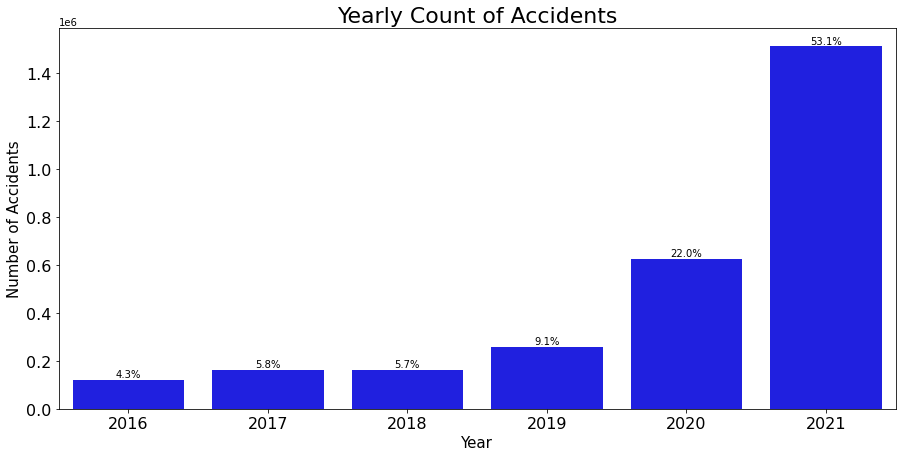

In [ ]:
year_accident_count = data["Start_Time"].dt.year.value_counts()
year_accidents_count_df = pd.DataFrame(year_accident_count)
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=year_accidents_count_df, x=year_accidents_count_df.index, 
             y='Start_Time', color ='blue')

plt.title("Yearly Count of Accidents", fontsize = 22)
ax.set_xlabel("Year",fontsize=15)
ax.set_ylabel("Number of Accidents",fontsize=15)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Month Analysis

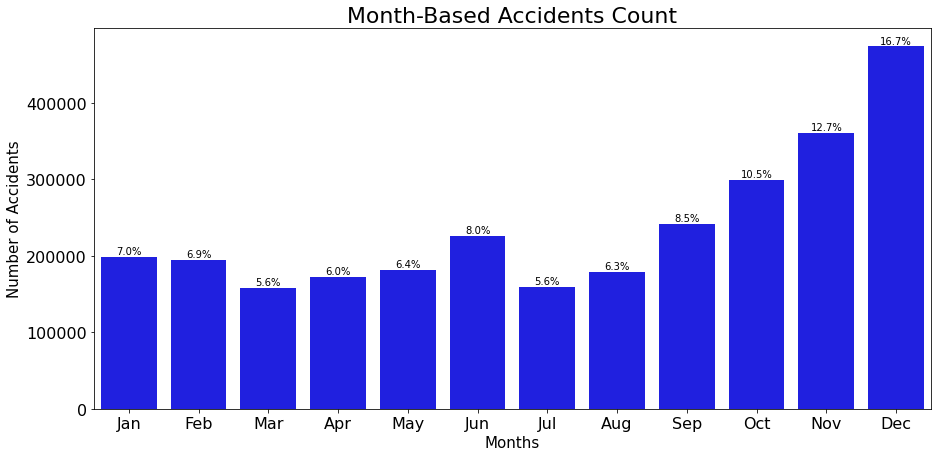

In [ ]:
month_accidents_count = data["Start_Time"].dt.month.value_counts()
month_accidents_count_df = pd.DataFrame(month_accidents_count)
month_accidents_count_df.sort_index(inplace=True)
month_accidents_count_df['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                                     'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=month_accidents_count_df, x=month_accidents_count_df.Month, 
             y='Start_Time', color ='blue')
plt.title("Month-Based Accidents Count", fontsize = 22)
ax.set_xlabel("Months",fontsize=15)
ax.set_ylabel("Number of Accidents",fontsize=15)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Week Analysis


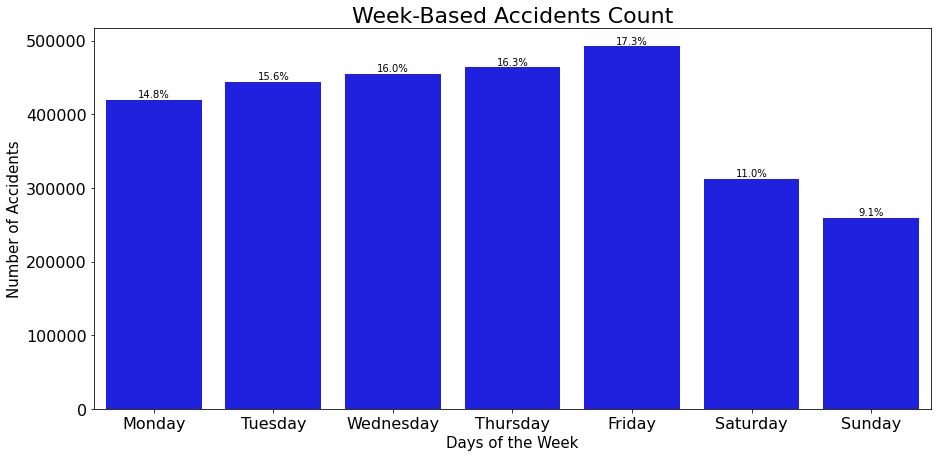

In [ ]:
week_accidents_count = data["Start_Time"].dt.day_name().value_counts()
week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_accidents_count_df = pd.DataFrame(week_accidents_count).reindex(week)

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=week_accidents_count_df, x=week_accidents_count_df.index, 
             y='Start_Time', color ='blue')
plt.title("Week-Based Accidents Count", fontsize = 22)
ax.set_xlabel("Days of the Week",fontsize=15)
ax.set_ylabel("Number of Accidents",fontsize=15)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

### Hour Analysis (Weekday)

In [22]:
# Transform Month/week/Hour to different features
data["Month"] = data["Start_Time"].dt.month
data["Week"] = data["Start_Time"].dt.day_name()
data["Hour"] = data["Start_Time"].dt.hour

In [23]:
weekdays_lst = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
hour_accidents_weekdays_count = data[data['Week'].isin(weekdays_lst)]["Start_Time"].dt.hour

In [24]:
hour_accidents_weekdays_count_df = pd.DataFrame(hour_accidents_weekdays_count.value_counts())
hour_accidents_weekdays_count_df.sort_index(inplace=True)


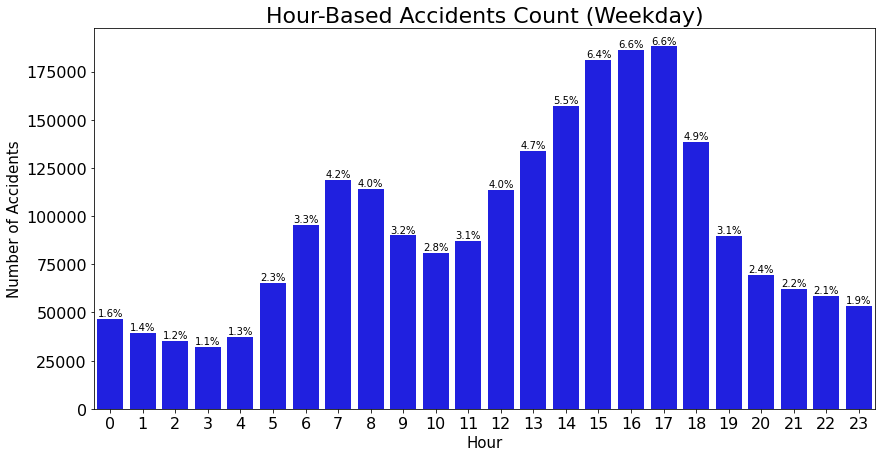

In [ ]:

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=hour_accidents_weekdays_count_df, x=hour_accidents_weekdays_count_df.index, 
             y='Start_Time', color ='blue')
plt.title("Hour-Based Accidents Count (Weekday)", fontsize = 22)
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("Number of Accidents",fontsize=15)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Extracting Weekend(Saturday and Sunday)

In [25]:
weekend = [ 'Saturday', 'Sunday']
hour_accidents_weekend_count = data[data['Week'].isin(weekend)]["Start_Time"].dt.hour
hour_accidents_weekend_count_df = pd.DataFrame(hour_accidents_weekend_count.value_counts())
hour_accidents_weekend_count_df.sort_index(inplace=True)


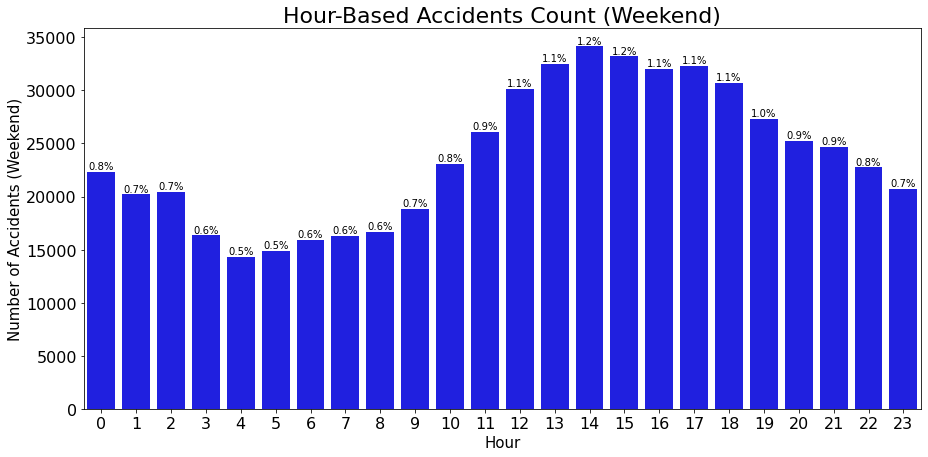

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=hour_accidents_weekend_count_df, x=hour_accidents_weekend_count_df.index, 
             y='Start_Time', color ='blue')
plt.title("Hour-Based Accidents Count (Weekend)", fontsize = 22)
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("Number of Accidents (Weekend)",fontsize=15)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Duration With Severity

In [26]:
# Calculate the mean Duration of each Severity
data["Duration"] = (data['End_Time'] - data['Start_Time']).dt.total_seconds() / 3600
mean_duration = data.groupby('Severity')["Duration"].mean().round(2)
mean_duration_df = pd.DataFrame(mean_duration)


In [27]:
mean_duration_fig = px.bar(mean_duration_df, 
                                   x = mean_duration_df.index, 
                                   y = "Duration", 
                                   labels={"index": "Severity"},
                                   text="Duration")
mean_duration_fig.update_layout(
    autosize=False,
    width=600,
    height=500,
    title={
        'text': "Mean Duration of each Severity",
        'y':0.95,
        'x':0.5,
        'font': {'size': 24},
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis={
        'type':'category'
    })
mean_duration_fig.show()

## Text Mining and  Natural language Processing
## Classification Model Naive Bayes Model (Text visualization)

Natural language is any language that is used by people in everyday like English or Spanish
Natural language processing is that any computation and manipulation of natural language to get inside about how words mean and how sentences are contructed is natural language processing.
Natural languages are in change like new words tweets
Natural language process tasks are counting words, finding unique words and sentence boundaries, identify semantic rules and entities in a sentence
We will use natural language tool kit that is open source library in python.
It supports most of the NLP tasks

In [ ]:
# provides functions for creating and removing a directory
import os

#for removing stopwords
from nltk.corpus import stopwords

# importing Natural language Processing
import nltk as nlp

# Importing Natural Language Toolkit (NLTK)
import nltk

# Importing library for Regular expression 
import re

# libary for text visualization
from wordcloud import WordCloud

# library for dictionary keys and their count
from collections import Counter

# library for sentimental analysis
from textblob import TextBlob
from textblob import classifiers


In [ ]:
# # %% remove non important word a, the, that, and, in 
nltk.download("stopwords")  # stopwords = (irrelavent words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# loading to the dataframe
data = pd.read_csv("drive/My Drive/US_Accidents.csv")

## Data Pre-processing for Text Mining

In [ ]:
data_text = pd.concat([data.Description, data.Severity], axis=1)

In [ ]:
data_text['Severity'] = np.where(data_text['Severity'] > 2, 'High', 'Low')

In [ ]:
data_text.head()

,Description,Severity
0,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,High
1,At OH-4/OH-235/Exit 41 - Accident.,Low
2,At I-71/US-50/Exit 1 - Accident.,Low
3,At Dart Ave/Exit 21 - Accident.,Low
4,At Mitchell Ave/Exit 6 - Accident.,High


### Data Cleaning

In [ ]:
# clean the text
# create the function to clean the accident description
def cleanTxt(text):
    text = re.sub(r'[0-9]+', '', text)# remove numbers
    return text
data_text['Description'] = data_text['Description'].apply(cleanTxt)
data_text['Description'] = data_text['Description'].str.strip().str.lower() #converting all test in small letters

In [ ]:
#text_chunk = data_text.head(50000)
#Randomly subsetting the data to make it more manageable 
#text_chunk = data_text.sample(frac=0.05, replace=True, random_state=101)

In [ ]:
text_chunk.head()

,Description,Severity
1525073,accident from frandale ave to ranlett ave.,Low
2301766,at idylwild rd - accident.,Low
661055,incident on us- eb near garrett rd drive with ...,Low
311895,stationary traffic on tn- from harding pl (don...,Low
2676733,closed at whispering pines st - road closed du...,High


In [ ]:
# Removing Stopwords
stop_words = stopwords.words('english')
text_chunk['Description']= text_chunk['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
text_chunk.head(5)

,Description,Severity_classify
0,sawmill rd/exit oh-/olentangy riv rd/exit - ac...,High
1,oh-/oh-/exit - accident.,Low
2,i-/us-/exit - accident.,Low
3,i-/us-/exit - accident.,Low
4,dart ave/exit - accident.,Low


In [ ]:
text_chunk.to_csv('text_chunk.csv') # saving the cleaned file in drive
!cp text_chunk.csv "drive/My Drive/"

In [ ]:
text_chunk = pd.read_csv("drive/My Drive/text_chunk.csv")

In [ ]:
text_chunk = text_chunk.drop(columns = ['Unnamed: 0'],axis=1)
text_chunk

,Description,Severity
0,sawmill rd/exit oh-/olentangy riv rd/exit - ac...,High
1,oh-/oh-/exit - accident.,Low
2,i-/us-/exit - accident.,Low
3,dart ave/exit - accident.,Low
4,mitchell ave/exit - accident.,High
...,...,...
49995,closed northlake blvd/exit sr-/pga blvd/exit -...,High
49996,closed sr-/pga blvd/exit northlake blvd/exit -...,High
49997,sr-/th ave - accident.,High
49998,oakley blv/western ave/exit c - accident.,High


## Sentiment Analysis

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] 
1 most positive statement and 
-1 most negative statement. 

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
#pip install -U textblob downloading textblob
#!pip install wordcloud
# python -m textblob.download_corpora

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
# Creating Subjectivity
text_chunk['Subjectivity'] = text_chunk['Description'].apply(getSubjectivity)

# Creating Polarity
text_chunk['Polarity'] = text_chunk['Description'].apply(getPolarity)

In [ ]:
text_high = text_chunk[text_chunk['Severity'] == 'High']
text_low = text_chunk[text_chunk['Severity'] == 'Low']

In [ ]:
text_chunk.tail() # Viewing the last 5 rows of the dataset

,Description,Severity,Subjectivity,Polarity
49995,closed northlake blvd/exit sr-/pga blvd/exit -...,High,0.191667,-0.108333
49996,closed sr-/pga blvd/exit northlake blvd/exit -...,High,0.191667,-0.108333
49997,sr-/th ave - accident.,High,0.000000,0.000000
49998,oakley blv/western ave/exit c - accident.,High,0.000000,0.000000
49999,nd st - accident.,Low,0.000000,0.000000


In [ ]:
# Filtering the dataset with the minimum Polarity
text_chunk[text_chunk['Polarity'] == text_chunk['Polarity'].min()]

,Description,Severity,Subjectivity,Polarity
5232,base line st - accident.,Low,1.0,-0.8
5831,base line rd/exit - accident.,Low,1.0,-0.8
6126,base line st - accident.,High,1.0,-0.8
7523,base line st ca-/th st - accident.,High,1.0,-0.8
8600,base line - accident.,Low,1.0,-0.8
8856,base line st - accident.,Low,1.0,-0.8
9166,base line st - accident.,High,1.0,-0.8
11726,base line rd/exit mountain ave/exit - accident.,High,1.0,-0.8
11728,base line rd/exit mountain ave/exit - accident.,Low,1.0,-0.8
11769,base line rd/exit - accident.,High,1.0,-0.8


In [ ]:
# Filtering the dataset with the Maximum Polarity
text_chunk[text_chunk['Polarity'] == text_chunk['Polarity'].max()]

,Description,Severity,Subjectivity,Polarity
42038,best st - accident.,Low,0.3,1.0


In [ ]:
# Filtering the dataset with the Maximum Subjectivity
text_chunk[text_chunk['Subjectivity'] == text_chunk['Subjectivity'].max()]

,Description,Severity,Subjectivity,Polarity
1200,grand ave (oakland) - accident.,Low,1.0,0.5
1481,grand ave - accident.,Low,1.0,0.5
1795,grand island rd - accident.,High,1.0,0.5
2732,grand ave/exit - accident.,Low,1.0,0.5
2934,grand ave (oakland) - accident.,Low,1.0,0.5
...,...,...,...,...
48990,grand river ave/exit - accident.,Low,1.0,0.5
49635,grand hill pl - accident.,Low,1.0,0.5
49713,wealthy st/exit - accident.,Low,1.0,0.5
49737,grand river ave/exit - accident.,Low,1.0,0.5


In [ ]:
# Filtering the dataset with the Minimum Subjectivity
text_chunk[text_chunk['Subjectivity'] == text_chunk['Subjectivity'].min()]

,Description,Severity,Subjectivity,Polarity
0,sawmill rd/exit oh-/olentangy riv rd/exit - ac...,High,0.0,0.0
1,oh-/oh-/exit - accident.,Low,0.0,0.0
2,i-/us-/exit - accident.,Low,0.0,0.0
3,dart ave/exit - accident.,Low,0.0,0.0
4,mitchell ave/exit - accident.,High,0.0,0.0
...,...,...,...,...
49992,lakewood ave/sylvan rd womack ave/knotts ave -...,High,0.0,0.0
49994,cr-t/exit - accident.,Low,0.0,0.0
49997,sr-/th ave - accident.,High,0.0,0.0
49998,oakley blv/western ave/exit c - accident.,High,0.0,0.0


## Text Visualization through Word Cloud

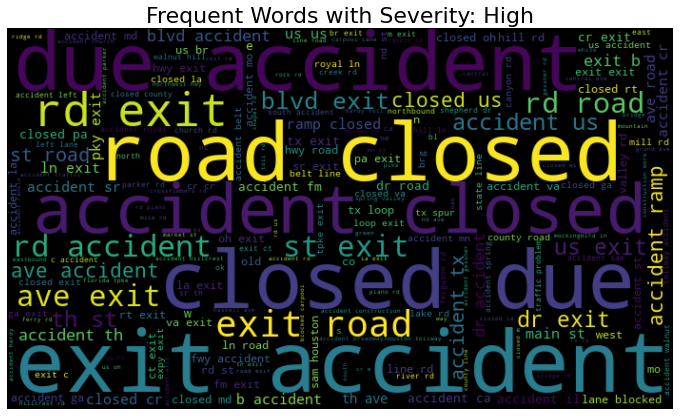

In [ ]:
# Plot the Word Cloud
plt.figure(figsize=(12, 7))
allWords = ''.join([posts for posts in text_high['Description']])
wordCloud = WordCloud(width = 700, height = 400, random_state = 21, max_font_size = 119).generate(allWords)
plt.title('Frequent Words with Severity: High',fontsize=22)
plt.imshow(wordCloud, interpolation = "bilinear")

plt.axis('off')
plt.show()

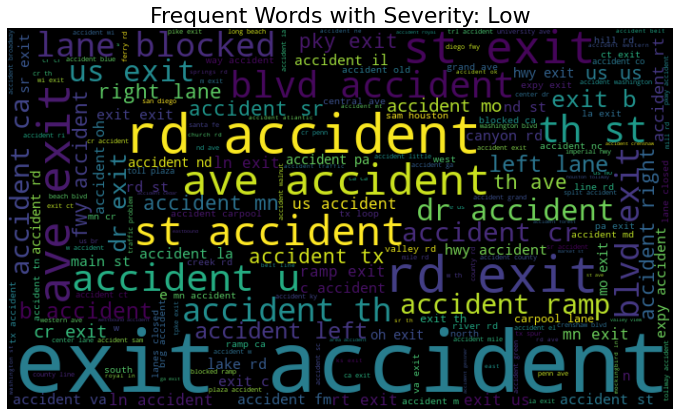

In [ ]:
# Plot the Word Cloud
plt.figure(figsize=(12, 7))
allWords = ''.join([posts for posts in text_low['Description']])
wordCloud = WordCloud(width = 700, height = 400, random_state = 21, max_font_size = 119).generate(allWords)
plt.title('Frequent Words with Severity: Low',fontsize=22)
plt.imshow(wordCloud, interpolation = "bilinear")

plt.axis('off')
plt.show()

# Pre-Processing Of Data for Machine Learning

In [17]:
# importing two different libraries for feature scaling
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder

# for splitting of data
from sklearn.model_selection import train_test_split

# Importing undersampling for balancing data
from imblearn.under_sampling import RandomUnderSampler 

# importing logistic regression classifier
from sklearn.linear_model import LogisticRegression 

#importing the RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

# importing XGBoost classifier
import xgboost as xgb

# Libraries for the performace of ML
# # Importing Performance Metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score,  recall_score, precision_score

# AUC/ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# For Hypertuning the parameters importing randomiused search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from pprint import pprint

## Feature Engineering and Label Encoding

## Pearson's Correlation Heat Map

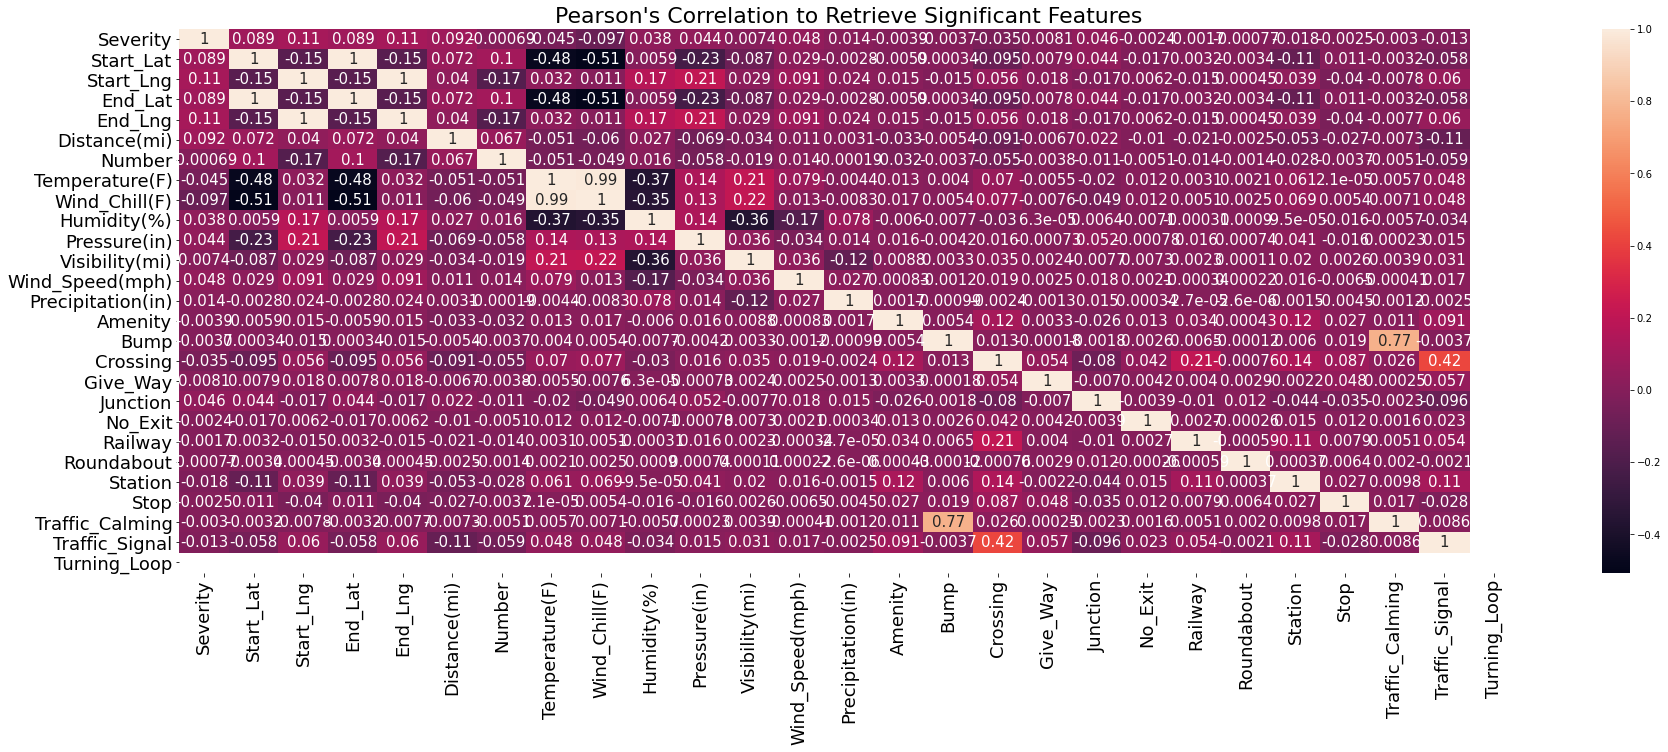

In [ ]:
plt.figure(figsize=(30,10))
b = sns.heatmap(data.corr(),annot=True, annot_kws={"size":15})
plt.title("Pearson's Correlation to Retrieve Significant Features", fontsize=22)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18) 
plt.show()

### Assumptions
1. very weak: 0 ~ 0.19
2. weak: 0.2 ~ 0.39
3. moderate: 0.4 ~ 0.59
4. strong: 0.6 ~ 0.79
5. very strong: 0.8 ~ 1

### Observations:
1. +ve relation of severity and start latitude STRONG
2. -ve relation of tempertaure and start latitude and end longitutude(-0.48) 
3. -ve relation of wind chill and start latitude and longitutude (-0.51)
4. Wind chill and temperature is strongly positive related to each other(0.99): VERY STRONG
5. Traffic Calming and bump is +ve relation (0.77) STRONG
6. Turning Loop and crossing are +ve relation (0.42) STRONG
7. Humidty and Temperature in negatively related to each other(-0.37): WEAK
8. Humidty and Wind chill in negatively related to each other(-0.37): WEAK
9. Wind speed and humdity negatively correlated (-0.17): MODERATE
10. visibility is related to temeperature and humidity (0.21 and 0.22): WEAK

In [28]:
# dropping which are less relevant features and saving in the different dataframe
data_model = data.drop(columns=['Start_Time', 'End_Time', 'Description','City', 'County',
                                  'State','Country', 'Amenity', 'Crossing', 'Junction','Railway', 'Station',
                                  'Bump', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 
                                  'Humidity(%)', 'Visibility(mi)', 'Temperature(F)'], axis=1) 

In [11]:
data_model.head()

,Severity,Distance(mi),Side,Wind_Chill(F),Pressure(in),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Give_Way,No_Exit,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,hours_traffic_impact,hour_of_accident,year_of_accident,month_of_accident
0,3,3.230,R,36.1,29.76,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,Night,6,0,2016,2
1,2,0.747,R,63.0,29.68,Calm,7.0,0.02,Light Rain,False,False,False,False,False,False,False,Night,6,5,2016,2
2,2,0.055,R,63.0,29.70,Calm,7.0,0.02,Overcast,False,False,False,False,False,False,False,Night,6,6,2016,2
3,2,0.123,R,63.0,29.65,Calm,7.0,0.00,Overcast,False,False,False,False,False,False,False,Night,6,6,2016,2
4,3,0.500,R,29.8,29.69,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,Day,6,7,2016,2


## One Hot Encoding

In [29]:
# Select features that are suitable for One Hot Encoding
# Wind_Direction Categorizing
#Calm
data_model.loc[data_model['Wind_Direction'].str.startswith('C'), 'Wind_Direction'] = 'C' 
#East, ESE, ENE
data_model.loc[data_model['Wind_Direction'].str.startswith('E'), 'Wind_Direction'] = 'E'
#West, WSW, WNW
data_model.loc[data_model['Wind_Direction'].str.startswith('W'), 'Wind_Direction'] = 'W'
#South, SSW, SSE
data_model.loc[data_model['Wind_Direction'].str.startswith('S'), 'Wind_Direction'] = 'S' 
#North, NNW, NNE
data_model.loc[data_model['Wind_Direction'].str.startswith('N'), 'Wind_Direction'] = 'N' 
#Variable
data_model.loc[data_model['Wind_Direction'].str.startswith('V'), 'Wind_Direction'] = 'V' 

In [30]:
# Weather_Condition Categorizing
# Fair, Cloudy, Clear, Partly_Cloud, Light_Rain, Scattered_Clouds since they are the top 6 weather condirtion impactinig any accident severity.

data_model['Weather_Fair'] = np.where(data_model['Weather_Condition'].str.contains('Fair', case=False, na = False), 1, 0)
data_model['Weather_Cloudy'] = np.where(data_model['Weather_Condition'].str.contains('Mostly Cloudy', case=False, na = False), 1, 0)
data_model['Weather_Clear'] = np.where(data_model['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
data_model['Partly_Cloud'] = np.where(data_model['Weather_Condition'].str.contains(' Partly Cloud', case=False, na = False), 1, 0)
data_model['Light_Rain'] = np.where(data_model['Weather_Condition'].str.contains('Light Rain', case=False, na = False), 1, 0)
data_model['Scattered_Clouds'] = np.where(data_model['Weather_Condition'].str.contains(' Scattered Clouds', case=False, na = False), 1, 0)

In [31]:
# dropping the original feature Weather_Condition
data_model = data_model.drop(columns=['Weather_Condition'], axis=1)

In [15]:
# Final features for the machine Learning
data_model.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754965 entries, 0 to 2845341
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Severity              int64  
 1   Distance(mi)          float64
 2   Side                  object 
 3   Wind_Chill(F)         float64
 4   Pressure(in)          float64
 5   Wind_Direction        object 
 6   Wind_Speed(mph)       float64
 7   Precipitation(in)     float64
 8   Give_Way              bool   
 9   No_Exit               bool   
 10  Roundabout            bool   
 11  Stop                  bool   
 12  Traffic_Calming       bool   
 13  Traffic_Signal        bool   
 14  Turning_Loop          bool   
 15  Sunrise_Sunset        object 
 16  hours_traffic_impact  int64  
 17  hour_of_accident      int64  
 18  year_of_accident      int64  
 19  month_of_accident     int64  
 20  Weather_Fair          int64  
 21  Weather_Cloudy        int64  
 22  Weather_Clear         int64  
 23  Partly_

## Label Encoding

In [32]:
# creating a new column as rating_classify where rating 1 and 2 is categorized as 'Low' rating and 3, 4 and as 'High' rating.
data_model['Severity'] = np.where(data_model['Severity'] > 2, 'High', 'Low')

In [18]:
data_model.head()

,Severity,Distance(mi),Side,Wind_Chill(F),Pressure(in),Wind_Direction,Wind_Speed(mph),Precipitation(in),Give_Way,No_Exit,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,hours_traffic_impact,hour_of_accident,year_of_accident,month_of_accident,Weather_Fair,Weather_Cloudy,Weather_Clear,Partly_Cloud,Light_Rain,Scattered_Clouds
0,High,3.230,R,36.1,29.76,S,10.4,0.00,False,False,False,False,False,False,False,Night,6,0,2016,2,0,0,0,0,1,0
1,Low,0.747,R,63.0,29.68,C,7.0,0.02,False,False,False,False,False,False,False,Night,6,5,2016,2,0,0,0,0,1,0
2,Low,0.055,R,63.0,29.70,C,7.0,0.02,False,False,False,False,False,False,False,Night,6,6,2016,2,0,0,0,0,0,0
3,Low,0.123,R,63.0,29.65,C,7.0,0.00,False,False,False,False,False,False,False,Night,6,6,2016,2,0,0,0,0,0,0
4,High,0.500,R,29.8,29.69,W,10.4,0.01,False,False,False,False,False,False,False,Day,6,7,2016,2,0,0,0,0,1,0


In [33]:
# Select features that are suitable for Label Encoding
label_encoding_features = ['Side','Wind_Direction', 'Give_Way', 'No_Exit', 'Roundabout', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 
                           'Sunrise_Sunset']
# Label Encoding
for feature in label_encoding_features:
    data_model[feature] = LabelEncoder().fit_transform(data_model[feature])

In [35]:
# As the data is very large, I have 10% sampled the data which makes it easy to tune the model later
data_modelling = data_model.sample(frac =.1, random_state=1) #random sampling of 10% of the data
data_modelling.shape

(275496, 26)

In [36]:
data_x = data_modelling.drop('Severity', axis=1)
data_y = data_modelling.Severity

In [38]:
df_severity = pd.DataFrame(data_y)# creating dataframe with the target variables

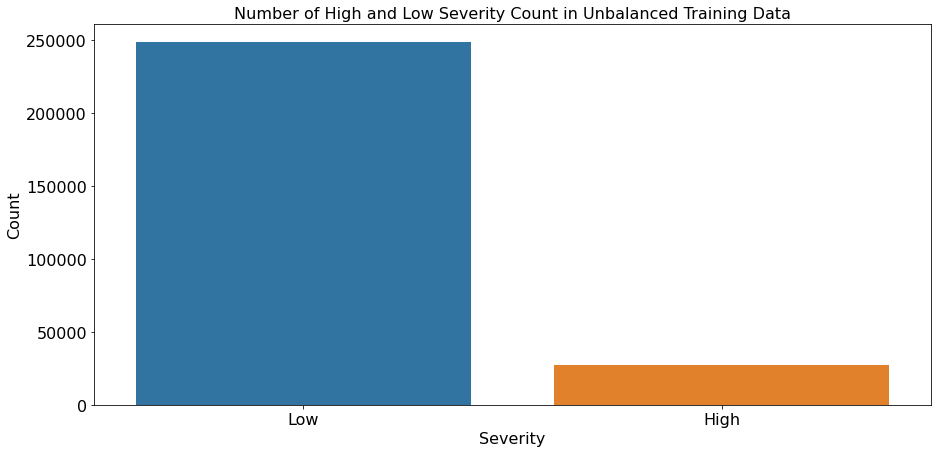

In [57]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df_severity,  x="Severity")
plt.title("Number of High and Low Severity Count in Unbalanced Training Data", fontsize=16)
ax.set_xlabel("Severity",fontsize=16)
ax.set_ylabel("Count",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plt.show()

### UnderSampling

In [40]:
#data_x, data_y
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(data_x, data_y)

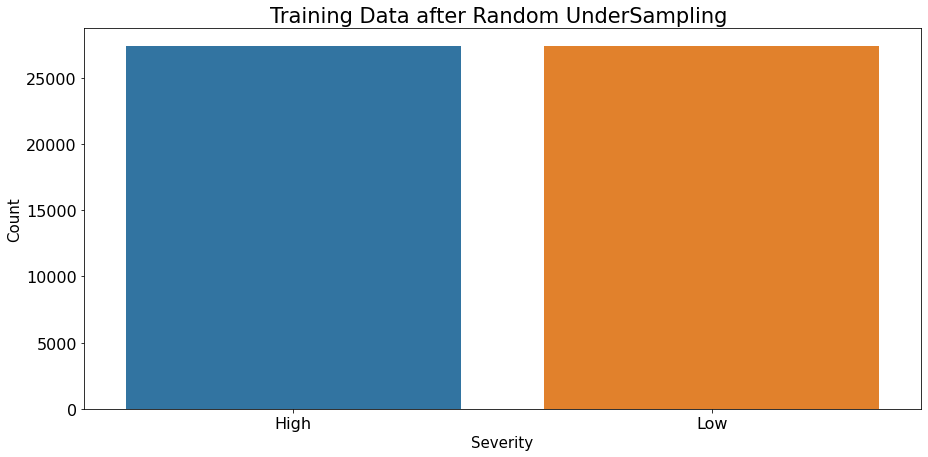

In [58]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x = y_resampled)
ax.axes.set_title("Training Data after Random UnderSampling ", fontsize=21)
ax.set_xlabel("Severity",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plt.show()

## Robust Scaler

In [41]:
# creating instance of robust Scaler
robust = RobustScaler()

# using fit and transfer function
X_resampled = robust.fit_transform(X_resampled)

data_model = pd.DataFrame(X_resampled)
data_model.columns = data_x.columns
data_model.head()

,Distance(mi),Side,Wind_Chill(F),Pressure(in),Wind_Direction,Wind_Speed(mph),Precipitation(in),Give_Way,No_Exit,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,hours_traffic_impact,hour_of_accident,year_of_accident,month_of_accident,Weather_Fair,Weather_Cloudy,Weather_Clear,Partly_Cloud,Light_Rain,Scattered_Clouds
0,3.041885,-1.0,-1.210526,-1.250000,-0.5,-0.185185,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.4,1.000000,-0.333333,0.500000,0.0,0.0,0.0,0.0,0.0,0.0
1,6.178010,0.0,-2.789474,0.515625,0.0,2.759259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,-0.555556,-0.333333,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.308901,0.0,-1.157895,0.625000,0.5,0.629630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,-0.444444,-1.333333,0.833333,0.0,0.0,0.0,0.0,0.0,0.0
3,0.920157,0.0,-1.721053,-0.015625,1.5,0.629630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,-0.666667,-1.000000,-1.000000,0.0,1.0,0.0,0.0,0.0,0.0
4,0.329843,0.0,0.000000,0.343750,0.0,1.259259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.111111,-0.666667,-0.500000,0.0,0.0,1.0,0.0,0.0,0.0


## Predictive Models Machine Learning

### Train Test Split

In [42]:
# Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(data_model, y_resampled, test_size = 0.3, random_state=0)

## Logistic Regression with SMOTE

### Default Parameters

In [ ]:
#Logistic Regression
start = datetime.now()

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

params = logistic_reg.get_params()
# printing default parameter 
print(params)
print('time taken:', datetime.now() - start)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
time taken: 0:00:00.813911


In [ ]:
logistic_reg_predictions = logistic_reg.predict(X_test)

In [ ]:
#Classification Accuracy
logistic_reg_predictions = logistic_reg.predict(X_test)
print(classification_report(y_test, logistic_reg_predictions))

              precision    recall  f1-score   support

        High       0.79      0.74      0.76     26247
         Low       0.75      0.80      0.78     26217

    accuracy                           0.77     52464
   macro avg       0.77      0.77      0.77     52464
weighted avg       0.77      0.77      0.77     52464



In [ ]:
print(f"Accuracy Score is {round(accuracy_score(y_test,logistic_reg_predictions), 2)}")
print("Recall score: {}".format(recall_score(y_test,logistic_reg_predictions)))
print("Precision score: {}".format(precision_score(y_test,logistic_reg_predictions)))
print("F1 Score: {}".format(f1_score(y_test,logistic_reg_predictions)))

Accuracy Score is 0.77
Recall score: 0.7945939364422258
Precision score: 0.7540150202195263
F1 Score: 0.7737728242826654





## Hypertuning Logistic Classifier with Randomized Search




In [ ]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

In [ ]:
start = datetime.now()
randomizedsearch = RandomizedSearchCV(logistic_reg, hyperparameters)#, n_iter=5)
best_model_random = randomizedsearch.fit(X_train, y_train)
print(best_model_random.best_estimator_)
print('time taken:', datetime.now() - start)

LogisticRegression(C=1291.5496650148827, solver='liblinear')
time taken: 0:09:11.255979


We have obtained the best parameter for the logistic classifier

In [ ]:
# After Hypertuning Parameter
start = datetime.now()

logistic_reg1 = LogisticRegression(C=1291.5496650148827, random_state=0, solver='liblinear')
logistic_reg1.fit(X_train, y_train)

print('time taken:', datetime.now() - start)

time taken: 0:00:00.249294


### Logistic Regression Model Evalution

#### Classification Report

In [ ]:
#Classification Accuracy for hyerparameter tuning
logistic_reg_predictions1 = logistic_reg1.predict(X_test)

In [ ]:
#Classification Accuracy for hyerparameter tuning
logistic_reg_predictions1 = logistic_reg1.predict(X_test)
print(classification_report(y_test, logistic_reg_predictions1))

              precision    recall  f1-score   support

        High       0.78      0.74      0.76      8206
         Low       0.75      0.80      0.77      8213

    accuracy                           0.77     16419
   macro avg       0.77      0.77      0.77     16419
weighted avg       0.77      0.77      0.77     16419



In [ ]:
print(f"Accuracy Score is {round(accuracy_score(y_test,logistic_reg_predictions1), 2)}")
print("Recall score: {}".format(recall_score(y_test,logistic_reg_predictions1)))
print("Precision score: {}".format(precision_score(y_test,logistic_reg_predictions1)))
print("F1 Score: {}".format(f1_score(y_test,logistic_reg_predictions1)))

Accuracy Score is 0.77
Recall score: 0.7950809691951783
Precision score: 0.753606462781304
F1 Score: 0.7737883635501837


In [ ]:
# Accuracy on Train data
print("The Training Accuracy is: ", logistic_reg.score(X_train, y_train))
# Accuracy on Test data
print("The Testing Accuracy is: ", logistic_reg.score(X_test, y_test))

The Training Accuracy is:  0.7688869404443089
The Testing Accuracy is:  0.7714813967673071


#### Confusion Matrix for Logistic Regression

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, logistic_reg_predictions)

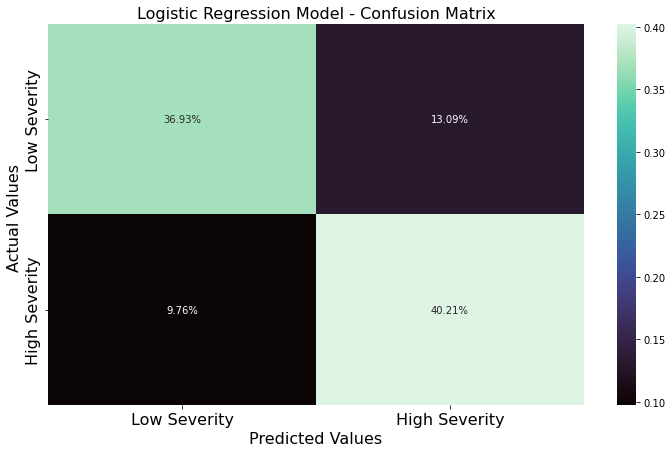

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='mako')
plt.title("Logistic Regression Model - Confusion Matrix", fontsize=16)
ax.xaxis.set_ticklabels(["Low Severity","High Severity"], fontsize=16)
ax.yaxis.set_ticklabels(["Low Severity","High Severity"], fontsize=16)
ax.set_xlabel('Predicted Values', fontsize=16)
ax.set_ylabel('Actual Values ', fontsize=16)
plt.show()

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, logistic_reg_predictions)
plt.figure(figsize=(12, 7))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='mako')
plt.title("Logistic Regression Model - Confusion Matrix", fontsize=16)
ax.xaxis.set_ticklabels(["Low Severity","High Severity"], fontsize=16)
ax.yaxis.set_ticklabels(["Low Severity","High Severity"], fontsize=16)
ax.set_xlabel('Predicted Values', fontsize=16)
ax.set_ylabel('Actual Values ', fontsize=16)
plt.show()

# Random Forest Classification Model

### Random Forest with default parameters

In [ ]:
# creating RF classifier model
start = datetime.now()
rfc = RandomForestClassifier()

# fitting the training data on RF model
rfc.fit(X_train, y_train)

params = rfc.get_params()
# printing default parameter 
print(params)
print('time taken:', datetime.now() - start)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
time taken: 0:00:05.234468


In [ ]:
# creating prediction variable on test set
rfc_pred = rfc.predict(X_test)
# creating classification_report test data set for target variable 'Severity'
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        High       0.84      0.88      0.86     22100
         Low       0.87      0.83      0.85     22088

    accuracy                           0.85     44188
   macro avg       0.86      0.85      0.85     44188
weighted avg       0.86      0.85      0.85     44188



In [ ]:
print(f"Accuracy Score is {round(accuracy_score(y_test,rfc_pred), 2)}")
print("Recall score: {}".format(recall_score(y_test,rfc_pred)))
print("Precision score: {}".format(precision_score(y_test,rfc_pred)))
print("F1 Score: {}".format(f1_score(y_test,rfc_pred)))

Accuracy Score is 0.85
Recall score: 0.8204066723487154
Precision score: 0.8734767954368681
F1 Score: 0.8461103786023733


In [ ]:
# Accuracy on Test
print("Training Accuracy is: ", rfc.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rfc.score(X_test, y_test))

Training Accuracy is:  0.8483725300827438
Testing Accuracy is:  0.8426213533101894


### Tuning Random Forest with Randomised CV

In [ ]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [ ]:
start = datetime.now()

#create random forest classifier model
rf_model = RandomForestClassifier()

# randomized search 
# Train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rfc, model_params, n_iter=100, cv=5, random_state=1)

# train the randomized search to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print the best hyperparameters
pprint(model.best_estimator_.get_params())
print('time taken:', datetime.now() - start)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.304740460832627,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.016934696827956865,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 171,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
time taken: 0:42:15.649883


In [ ]:
start = datetime.now()
# building the RF with the tuned parameters
rfc = RandomForestClassifier(max_features = 0.304740460832627, min_samples_split = 0.016934696827956865, n_estimators = 171,)
# creating RF classifier model
rfc.fit(X_train, y_train)
print('time taken:', datetime.now() - start)

time taken: 0:00:06.436256


## Performance Metrics with the tuned Hyperparameters

### Classification Report

In [ ]:
# creating prediction variable on test set
rfc_pred = rfc.predict(X_test)

In [ ]:
# creating prediction variable on test set
rfc_pred = rfc.predict(X_test)
# creating classification_report test data set for target variable 'Severity'
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        High       0.82      0.88      0.85      8206
         Low       0.87      0.81      0.84      8213

    accuracy                           0.84     16419
   macro avg       0.85      0.84      0.84     16419
weighted avg       0.85      0.84      0.84     16419



### Summary

In [ ]:
print(f"Accuracy Score is {round(accuracy_score(y_test,rfc_pred), 2)}")
print("Recall score: {}".format(recall_score(y_test,rfc_pred)))
print("Precision score: {}".format(precision_score(y_test,rfc_pred)))
print("F1 Score: {}".format(f1_score(y_test,rfc_pred)))

Accuracy Score is 0.84
Recall score: 0.814684037501522
Precision score: 0.8630207661550368
F1 Score: 0.8381560816735563


### Plotting Confusion Matrix in Seaborn Library

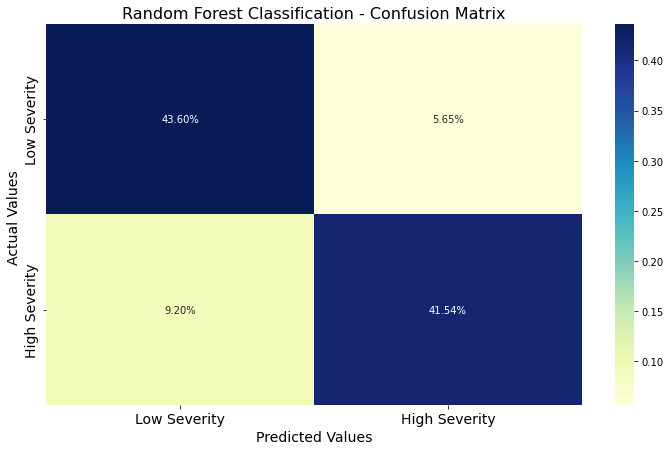

In [ ]:

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, rfc_pred)

# plotting Confusuon Matrix in Seaborn
plt.figure(figsize=(12, 7))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="YlGnBu")
plt.title("Random Forest Classification - Confusion Matrix", fontsize=16)
ax.xaxis.set_ticklabels(["Low Severity","High Severity"], fontsize=14)
ax.yaxis.set_ticklabels(["Low Severity","High Severity"], fontsize=14)
ax.set_xlabel('Predicted Values', fontsize=14)
ax.set_ylabel('Actual Values ', fontsize=14)
plt.show()

### Visualizing Imporant features

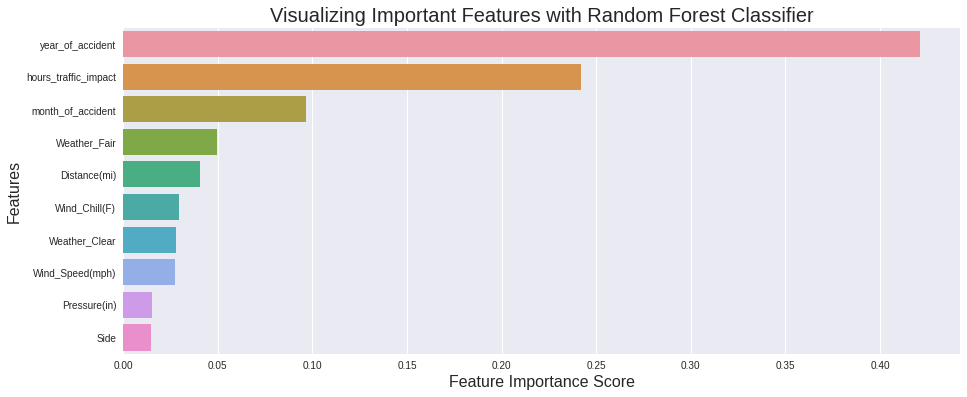

In [ ]:
plt.figure(figsize=(15, 6))
feature_imp = pd.Series(rfc.feature_importances_,index=data_model.columns).sort_values(ascending=False)
# Creating a bar plot showing top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title("Visualizing Important Features with Random Forest Classifier", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()



# XGBoost Classification Model

### XGBoost Classifier with default parameteres

In [ ]:
# Model Building
start = datetime.now()
xgb_cl1 = xgb.XGBClassifier()

# Fitting the training data
xgb_cl1.fit(X_train, y_train)

# Prediction on test data
xgb_pred = xgb_cl1.predict(X_test)
params = logistic_reg.get_params()
# printing default parameter 
print(params)
print('time taken:', datetime.now() - start)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
time taken: 0:00:02.792964


In [ ]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

        High       0.83      0.86      0.84      8206
         Low       0.86      0.82      0.84      8213

    accuracy                           0.84     16419
   macro avg       0.84      0.84      0.84     16419
weighted avg       0.84      0.84      0.84     16419



In [ ]:
print(f"Accuracy Score is {round(accuracy_score(y_test,xgb_pred), 2)}")
print("Recall score: {}".format(recall_score(y_test,xgb_pred)))
print("Precision score: {}".format(precision_score(y_test,xgb_pred)))
print("F1 Score: {}".format(f1_score(y_test,xgb_pred)))

Accuracy Score is 0.84
Recall score: 0.8218677706075733
Precision score: 0.8556217518063126
F1 Score: 0.8384051670599926


### Hyperparameter Tuning for XGBOOST

In [ ]:
params = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.25, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]
}

In [ ]:
xgb_cl = xgb.XGBClassifier()

In [ ]:
start = datetime.now()

random_search = RandomizedSearchCV(xgb_cl,param_distributions= params, n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3 )
best_model_random = random_search.fit(X_train, y_train)
print(best_model_random.best_params_)
print('time taken:', datetime.now() - start)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}
time taken: 0:00:22.946727


### XGBoost Classifier with Best Parameteres

In [ ]:
# Model Building
start = datetime.now()
xgb_cl2 = xgb.XGBClassifier(max_depth=8, learning_rate=0.15,  min_child_weight=5, gamma = 0.1, colsample_bytree= 0.4)

# Fitting the training data
xgb_cl2.fit(X_train, y_train)

# # Prediction on test data
preds2 = xgb_cl2.predict(X_test)
print('time taken:', datetime.now() - start)

time taken: 0:00:03.775862


## Performance Metrics with the Tuned Hyperparameters

### Classification Report

In [ ]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

        High       0.83      0.89      0.85      8206
         Low       0.88      0.81      0.84      8213

    accuracy                           0.85     16419
   macro avg       0.85      0.85      0.85     16419
weighted avg       0.85      0.85      0.85     16419



### Plotting Confusion Matrix in Seaborn

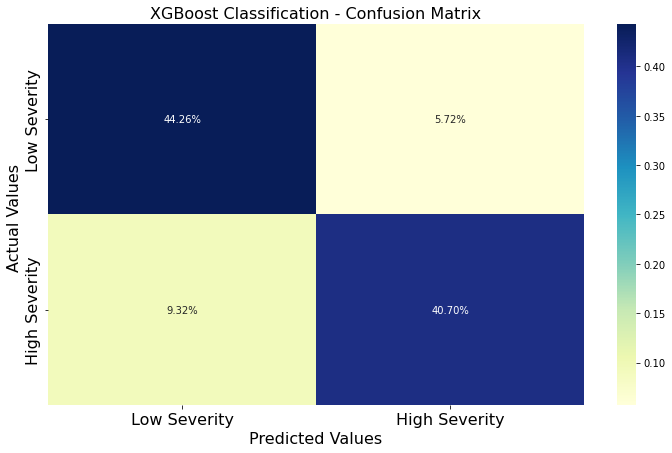

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, preds2)

# plotting Confusion Matrix in Seaborn
plt.figure(figsize=(12, 7))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="YlGnBu")
plt.title("XGBoost Classification - Confusion Matrix", fontsize=16)
ax.xaxis.set_ticklabels(["Low Severity","High Severity"], fontsize=16)
ax.yaxis.set_ticklabels(["Low Severity","High Severity"], fontsize=16)
ax.set_xlabel('Predicted Values', fontsize=16)
ax.set_ylabel('Actual Values ', fontsize=16)
plt.show()

In [ ]:
print(f"Accuracy Score is {round(accuracy_score(y_test,preds2), 2)}")
print("Recall score: {}".format(recall_score(y_test,preds2)))
print("Precision score: {}".format(precision_score(y_test,preds2)))
print("F1 Score: {}".format(f1_score(y_test,preds2)))

Accuracy Score is 0.85
Recall score: 0.8137099719956167
Precision score: 0.8768039884544739
F1 Score: 0.8440795705715187


### Feature Importance

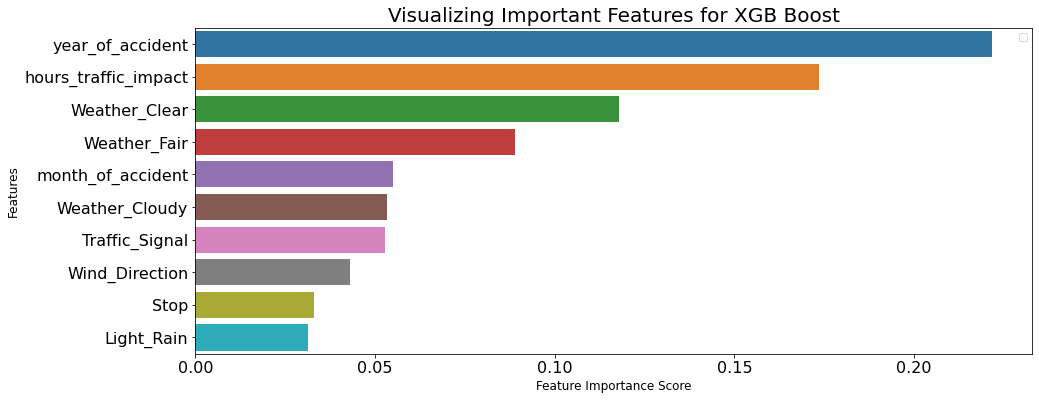

In [ ]:
plt.figure(figsize=(15, 6))
feature_imp = pd.Series(xgb_cl.feature_importances_,index=data_model.columns).sort_values(ascending=False)
# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features for XGB Boost", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

# Model Comparision

##ROC-AUC Curve

In [50]:
!pip install scikit-plot # install everytime in a new session
# Library for ROC curve
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
#predict probabilities for all the three MLs
pred_prob_lr = logistic_reg1.predict_proba(X_test)
pred_prob_rf = rfc.predict_proba(X_test)
pred_prob_xg = xgb_cl2.predict_proba(X_test)

In [47]:
 # roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)# LR
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1) #RF

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#### The AUC score can be computed using the roc_auc_score() method of sklearn:

In [48]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob_xg[:,1])

print("The AUC Score for Logistic Regression Classifier is", round(auc_score1, 2))
print("The AUC Score for Random Forest Classifier is ", round(auc_score2, 2))
print("The AUC Score for XGBoost Classifier is ", round(auc_score3, 2))

The AUC Score for Logistic Regression Classifier is 0.83
The AUC Score for Random Forest Classifier is  0.89
The AUC Score for XGBoost Classifier is  0.91


## ROC Curve with skplt library

## ROC Curve For RF Model Logistic Regression

<Figure size 1080x504 with 0 Axes>

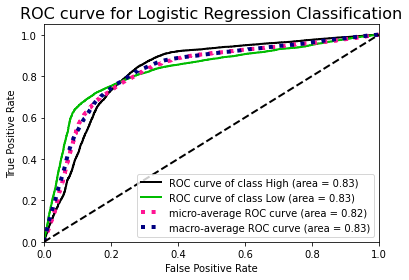

In [51]:
plt.figure(figsize=(15, 7))
skplt.metrics.plot_roc_curve(y_test, pred_prob_lr)
# title
plt.title('ROC curve for Logistic Regression Classification', fontsize=16)

plt.show()

## ROC Curve For RF Model

<Figure size 864x504 with 0 Axes>

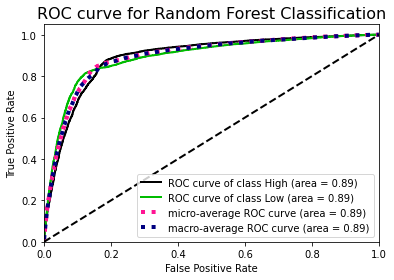

In [52]:
plt.figure(figsize=(12, 7))
skplt.metrics.plot_roc_curve(y_test, pred_prob_rf)
# title
plt.title('ROC curve for Random Forest Classification', fontsize=16)
plt.show()

<Figure size 864x504 with 0 Axes>

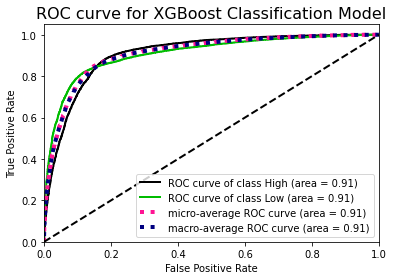

In [54]:
pred_prob_xg = xgb_cl2.predict_proba(X_test)
plt.figure(figsize=(12, 7))
#pred_prob_rf
skplt.metrics.plot_roc_curve(y_test, pred_prob_xg)
# title
plt.title('ROC curve for XGBoost Classification Model', fontsize=16)
plt.show()

## Bar Chart Of Accuracy of Classifers

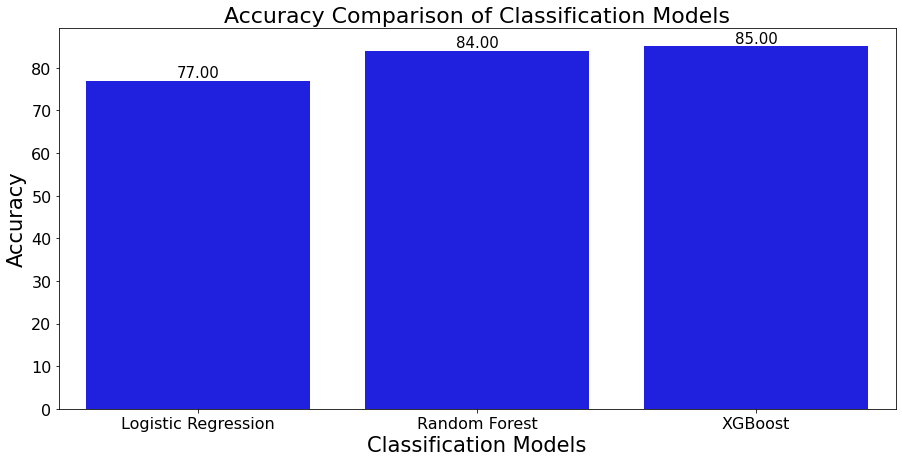

In [ ]:
Accuracy = {'Classification_Models': ['Logistic Regression','Random Forest', 'XGBoost'], 'Accuracy': [77, 84, 85]}
Accuracy_df = pd.DataFrame.from_dict(Accuracy)
plt.figure(figsize=(15, 7))

ax = sns.barplot(data=Accuracy_df, x=Accuracy_df.Classification_Models, 
             y='Accuracy', color ='blue')
# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
plt.title("Accuracy Comparison of Classification Models", fontsize = 22)
ax.set_xlabel("Classification Models",fontsize=21)
ax.set_ylabel("Accuracy",fontsize=21)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Model Comparison of Auc Score

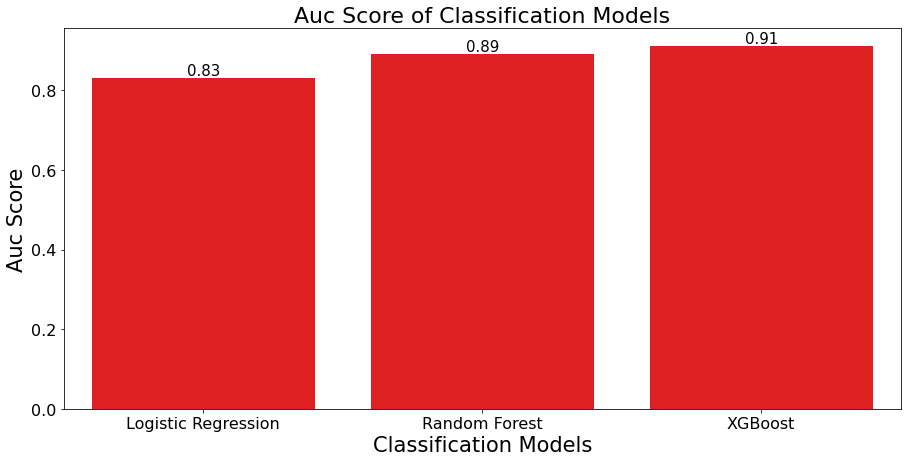

In [ ]:
auc_score = {'Classification_Models': ['Logistic Regression','Random Forest', 'XGBoost'], 'Auc_curve': [0.83, 0.89, 0.91]}
auc_score_df = pd.DataFrame.from_dict(auc_score, )
plt.figure(figsize=(15, 7))

ax = sns.barplot(data=auc_score_df, x=auc_score_df.Classification_Models, 
             y='Auc_curve', color ='red')
# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
plt.title("Auc Score of Classification Models", fontsize = 22)
ax.set_xlabel("Classification Models",fontsize=21)
ax.set_ylabel("Auc Score",fontsize=21)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()